# Chapter 6: Decision Trees

## Comprehensive Guide with Theory, Code, and Mathematical Foundations

---

**Learning Objectives:**
- Understand Decision Tree fundamentals and applications
- Learn the CART training algorithm
- Master both classification and regression with Decision Trees
- Explore regularization techniques and hyperparameter tuning
- Understand the mathematical foundations (Gini Impurity, Entropy)
- Implement practical examples and solve comprehensive exercises

---

## 1. Setup and Imports

Let's start by installing required packages and importing necessary libraries for our Decision Tree exploration.

In [1]:
# Install required packages for Google Colab
!pip install graphviz
!apt-get install graphviz

# For rendering decision trees
import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
# Essential imports for Decision Trees
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scikit-learn imports
from sklearn.datasets import load_iris, make_moons, make_classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# For visualization
import graphviz
from IPython.display import Image, display

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All packages imported successfully!")

✅ All packages imported successfully!


## 2. Introduction to Decision Trees

### 2.1 What are Decision Trees?

Decision Trees are versatile Machine Learning algorithms that can perform:
- **Classification tasks**: Predicting discrete classes
- **Regression tasks**: Predicting continuous values
- **Multioutput tasks**: Predicting multiple outputs simultaneously

### 2.2 Key Characteristics

**Advantages:**
- **White Box Models**: Easy to interpret and understand
- **No Data Preprocessing**: No need for feature scaling or centering
- **Handle Both Numerical and Categorical Features**
- **Fast Predictions**: O(log₂(m)) complexity

**Disadvantages:**
- **Prone to Overfitting**: Especially with deep trees
- **Instability**: Small changes in data can result in very different trees
- **Orthogonal Decision Boundaries**: All splits are perpendicular to axes

### 2.3 Mathematical Foundation

Decision Trees work by recursively splitting the dataset based on feature values to minimize impurity. The two main impurity measures are:

**Gini Impurity:**
$$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$$

**Entropy:**
$$H_i = -\sum_{k=1}^{n} p_{i,k} \log_2(p_{i,k})$$

Where:
- $p_{i,k}$ is the ratio of class k instances among the training instances in the i-th node
- $n$ is the number of classes

---

## 3. Training and Visualizing Decision Trees

Let's start with a practical example using the famous Iris dataset to understand how Decision Trees work.

In [3]:
# Load the Iris dataset
iris = load_iris()

# Use only petal length and width for 2D visualization
X = iris.data[:, 2:]  # petal length and width
y = iris.target

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {iris.feature_names[2:]}")
print(f"Target names: {iris.target_names}")
print(f"\nFirst 5 samples:")
print(f"Features: {X[:5]}")
print(f"Targets: {y[:5]}")

Dataset shape: (150, 2)
Feature names: ['petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 samples:
Features: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
Targets: [0 0 0 0 0]


### 3.1 Training a Decision Tree Classifier

We'll train a Decision Tree with `max_depth=2` to keep it simple for visualization and understanding.

In [4]:
# Create and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print(f"✅ Decision Tree trained successfully!")
print(f"Tree depth: {tree_clf.get_depth()}")
print(f"Number of leaves: {tree_clf.get_n_leaves()}")

# Check the tree's performance on training data
train_accuracy = tree_clf.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

✅ Decision Tree trained successfully!
Tree depth: 2
Number of leaves: 3
Training accuracy: 0.9600


### 3.2 Visualizing the Decision Tree

Visualization is crucial for understanding how Decision Trees make decisions. We'll use both text representation and graphical visualization.

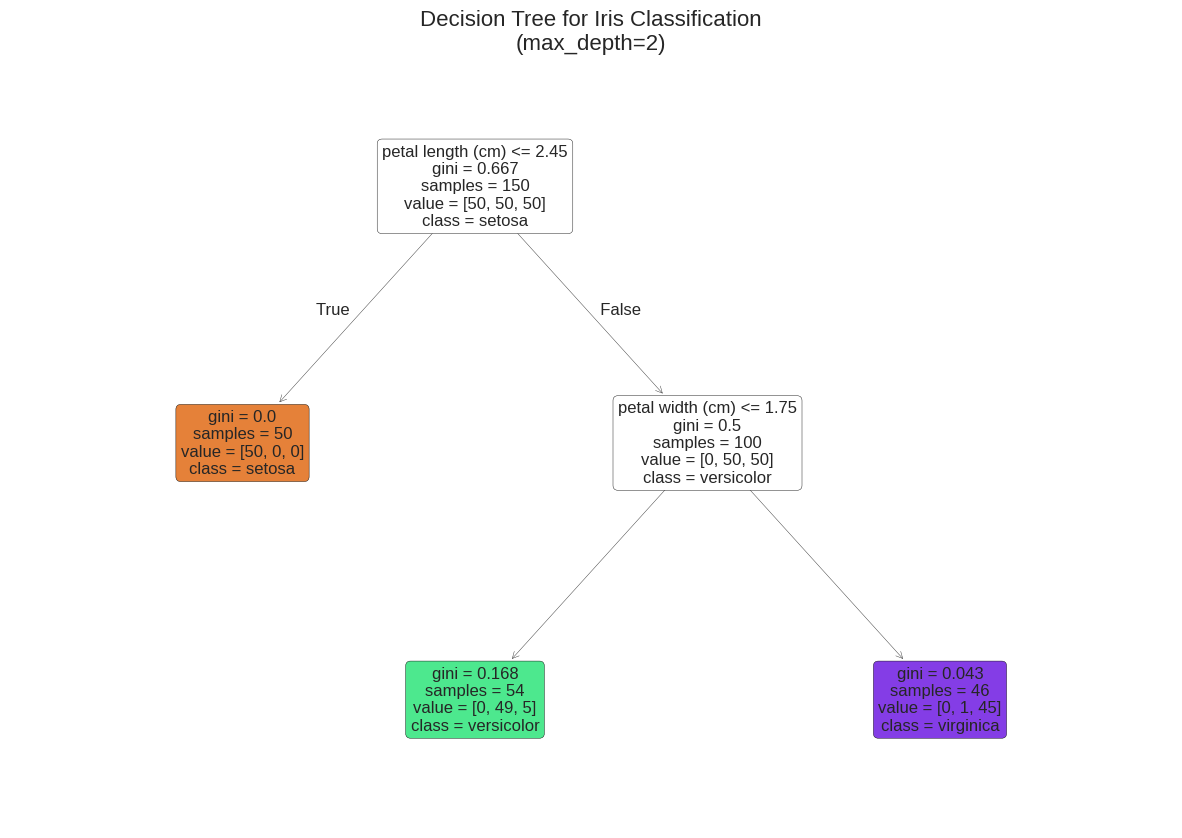

📊 This visualization shows:
• Each internal node contains a decision rule (e.g., 'petal length <= 2.45')
• Each node shows the gini impurity, samples count, and value distribution
• Leaf nodes show the final predicted class
• Colors represent the majority class in each node


In [5]:
# Method 1: Using matplotlib (built-in sklearn visualization)
plt.figure(figsize=(15, 10))
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree for Iris Classification\n(max_depth=2)", fontsize=16)
plt.show()

print("📊 This visualization shows:")
print("• Each internal node contains a decision rule (e.g., 'petal length <= 2.45')")
print("• Each node shows the gini impurity, samples count, and value distribution")
print("• Leaf nodes show the final predicted class")
print("• Colors represent the majority class in each node")

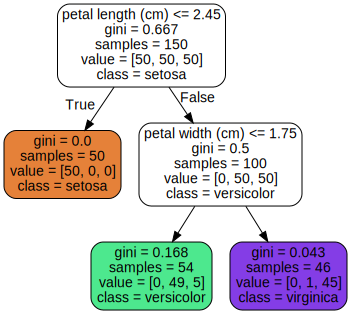


🔍 Understanding the Node Information:
• First line: Decision rule (for internal nodes)
• gini: Gini impurity measure (0 = pure, higher = more mixed)
• samples: Number of training instances reaching this node
• value: Distribution of classes [setosa, versicolor, virginica]
• class: Predicted class (majority class in the node)


In [6]:
# Method 2: Using Graphviz for more detailed visualization
dot_data = export_graphviz(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# Create and display the graph
graph = graphviz.Source(dot_data)
display(graph)

print("\n🔍 Understanding the Node Information:")
print("• First line: Decision rule (for internal nodes)")
print("• gini: Gini impurity measure (0 = pure, higher = more mixed)")
print("• samples: Number of training instances reaching this node")
print("• value: Distribution of classes [setosa, versicolor, virginica]")
print("• class: Predicted class (majority class in the node)")

## 4. Making Predictions

### 4.1 How Decision Trees Make Predictions

To make a prediction, a Decision Tree:
1. **Starts at the root node** (depth 0)
2. **Evaluates the decision rule** (e.g., "petal length ≤ 2.45 cm?")
3. **Follows the appropriate branch** (True → left, False → right)
4. **Repeats until reaching a leaf node**
5. **Returns the majority class** of that leaf node

Let's trace through some predictions step by step:

In [7]:
# Let's manually trace a prediction
def trace_prediction(tree, X_sample, feature_names, class_names):
    """
    Manually trace how a decision tree makes a prediction
    """
    print(f"🔍 Tracing prediction for sample: {X_sample}")
    print(f"Features: {feature_names[0]}={X_sample[0]:.2f}, {feature_names[1]}={X_sample[1]:.2f}\n")

    # Start at root
    node_id = 0
    depth = 0

    # Get tree structure
    tree_structure = tree.tree_

    while tree_structure.children_left[node_id] != tree_structure.children_right[node_id]:
        # This is an internal node
        feature_idx = tree_structure.feature[node_id]
        threshold = tree_structure.threshold[node_id]
        feature_name = feature_names[feature_idx]

        print(f"📍 Depth {depth}: Node {node_id}")
        print(f"   Decision rule: {feature_name} <= {threshold:.3f}")
        print(f"   Sample value: {X_sample[feature_idx]:.3f}")

        if X_sample[feature_idx] <= threshold:
            print(f"   ✅ TRUE → Go to left child")
            node_id = tree_structure.children_left[node_id]
        else:
            print(f"   ❌ FALSE → Go to right child")
            node_id = tree_structure.children_right[node_id]

        depth += 1
        print()

    # Reached a leaf node
    prediction = np.argmax(tree_structure.value[node_id])
    samples_in_leaf = tree_structure.n_node_samples[node_id]
    class_distribution = tree_structure.value[node_id][0]

    print(f"🎯 Final: Leaf node {node_id} (depth {depth})")
    print(f"   Samples in leaf: {samples_in_leaf}")
    print(f"   Class distribution: {class_distribution}")
    print(f"   Predicted class: {class_names[prediction]}")

    return prediction

# Test with different samples
test_samples = [
    [2.0, 0.5],  # Should be setosa
    [4.0, 1.3],  # Should be versicolor
    [6.0, 2.0]   # Should be virginica
]

for i, sample in enumerate(test_samples):
    print(f"\n{'='*60}")
    print(f"EXAMPLE {i+1}")
    print(f"{'='*60}")

    manual_pred = trace_prediction(tree_clf, sample, iris.feature_names[2:], iris.target_names)
    sklearn_pred = tree_clf.predict([sample])[0]

    print(f"\n🔗 Verification:")
    print(f"   Manual prediction: {iris.target_names[manual_pred]}")
    print(f"   Sklearn prediction: {iris.target_names[sklearn_pred]}")
    print(f"   Match: {'✅' if manual_pred == sklearn_pred else '❌'}")


EXAMPLE 1
🔍 Tracing prediction for sample: [2.0, 0.5]
Features: petal length (cm)=2.00, petal width (cm)=0.50

📍 Depth 0: Node 0
   Decision rule: petal length (cm) <= 2.450
   Sample value: 2.000
   ✅ TRUE → Go to left child

🎯 Final: Leaf node 1 (depth 1)
   Samples in leaf: 50
   Class distribution: [1. 0. 0.]
   Predicted class: setosa

🔗 Verification:
   Manual prediction: setosa
   Sklearn prediction: setosa
   Match: ✅

EXAMPLE 2
🔍 Tracing prediction for sample: [4.0, 1.3]
Features: petal length (cm)=4.00, petal width (cm)=1.30

📍 Depth 0: Node 0
   Decision rule: petal length (cm) <= 2.450
   Sample value: 4.000
   ❌ FALSE → Go to right child

📍 Depth 1: Node 2
   Decision rule: petal width (cm) <= 1.750
   Sample value: 1.300
   ✅ TRUE → Go to left child

🎯 Final: Leaf node 3 (depth 2)
   Samples in leaf: 54
   Class distribution: [0.         0.90740741 0.09259259]
   Predicted class: versicolor

🔗 Verification:
   Manual prediction: versicolor
   Sklearn prediction: versicol

### 4.2 Estimating Class Probabilities

Decision Trees can also estimate the probability that an instance belongs to a particular class. The probability is calculated as:

$$P(class_k | x) = \frac{\text{Number of class k instances in leaf}}{\text{Total instances in leaf}}$$

This is simply the ratio of training instances of class k in the leaf node where the instance ends up.

In [8]:
# Test probability estimation
test_sample = [[5.0, 1.5]]  # Example flower

# Get probabilities and prediction
probabilities = tree_clf.predict_proba(test_sample)
prediction = tree_clf.predict(test_sample)

print(f"🌸 Test sample: petal length = {test_sample[0][0]} cm, petal width = {test_sample[0][1]} cm")
print(f"\n📊 Class Probabilities:")
for i, (class_name, prob) in enumerate(zip(iris.target_names, probabilities[0])):
    print(f"   {class_name:12}: {prob:.4f} ({prob*100:.1f}%)")

predicted_class = iris.target_names[prediction[0]]
print(f"\n🎯 Predicted class: {predicted_class}")
print(f"   Confidence: {probabilities[0][prediction[0]]*100:.1f}%")

# Explain why these probabilities are identical across the region
print(f"\n💡 Key Insight:")
print(f"   These probabilities would be identical for any point in the same leaf region.")
print(f"   For example, a flower with petals 6 cm long and 1.5 cm wide would have")
print(f"   the same probabilities, even though it seems more likely to be virginica.")

# Demonstrate this
another_sample = [[6.0, 1.5]]
another_probs = tree_clf.predict_proba(another_sample)
print(f"\n🔍 Verification with [6.0, 1.5]:")
print(f"   Probabilities: {another_probs[0]}")
print(f"   Same as before: {'✅' if np.allclose(probabilities[0], another_probs[0]) else '❌'}")

🌸 Test sample: petal length = 5.0 cm, petal width = 1.5 cm

📊 Class Probabilities:
   setosa      : 0.0000 (0.0%)
   versicolor  : 0.9074 (90.7%)
   virginica   : 0.0926 (9.3%)

🎯 Predicted class: versicolor
   Confidence: 90.7%

💡 Key Insight:
   These probabilities would be identical for any point in the same leaf region.
   For example, a flower with petals 6 cm long and 1.5 cm wide would have
   the same probabilities, even though it seems more likely to be virginica.

🔍 Verification with [6.0, 1.5]:
   Probabilities: [0.         0.90740741 0.09259259]
   Same as before: ✅


### 4.3 Visualizing Decision Boundaries

Let's visualize how the Decision Tree partitions the feature space:

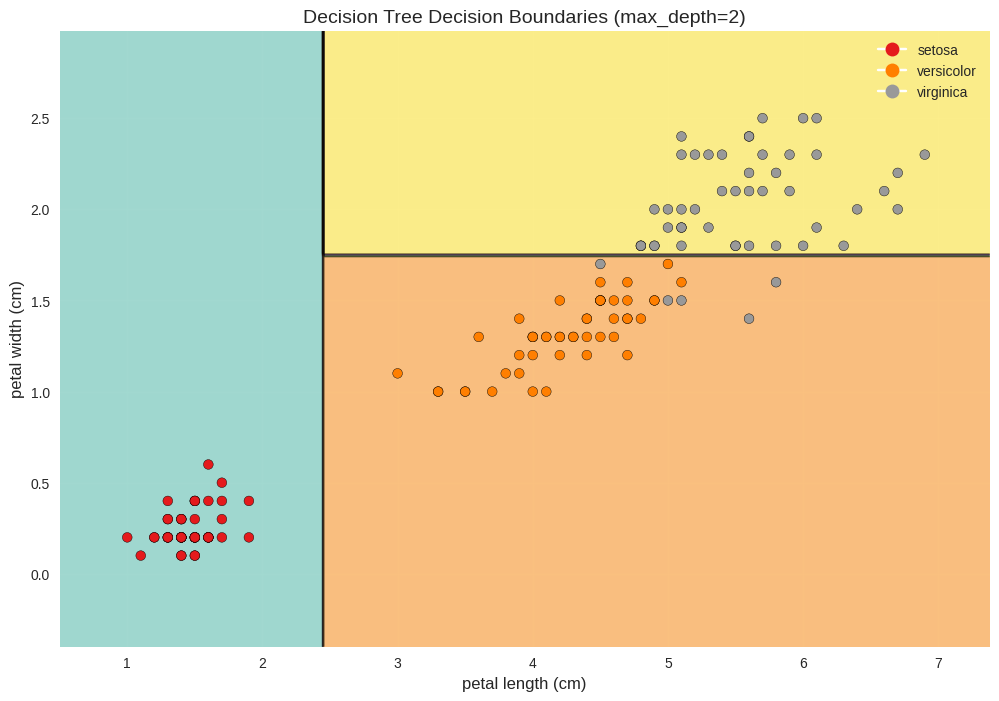

📊 Analysis of Decision Boundaries:
• The thick lines represent decision boundaries
• All splits are perpendicular to axes (orthogonal)
• Each region corresponds to a leaf node in the tree
• Colors represent the predicted class for each region


In [9]:
def plot_decision_boundaries(clf, X, y, feature_names, class_names, title="Decision Boundaries"):
    """
    Plot decision boundaries for a 2D dataset
    """
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(12, 8))

    # Plot decision regions
    colors = ['lightcoral', 'lightblue', 'lightgreen']
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set3)

    # Plot decision boundaries
    plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='black')

    # Customize plot
    plt.xlabel(feature_names[0], fontsize=12)
    plt.ylabel(feature_names[1], fontsize=12)
    plt.title(title, fontsize=14)

    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=scatter.cmap(scatter.norm(i)),
                                  markersize=10, label=class_names[i])
                       for i in range(len(class_names))]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundaries for our tree
plot_decision_boundaries(tree_clf, X, y,
                        iris.feature_names[2:],
                        iris.target_names,
                        "Decision Tree Decision Boundaries (max_depth=2)")

print("📊 Analysis of Decision Boundaries:")
print("• The thick lines represent decision boundaries")
print("• All splits are perpendicular to axes (orthogonal)")
print("• Each region corresponds to a leaf node in the tree")
print("• Colors represent the predicted class for each region")

## 5. The CART Training Algorithm

### 5.1 Algorithm Overview

**CART (Classification and Regression Trees)** is the algorithm used by Scikit-Learn to train Decision Trees. It works by:

1. **Greedy Search**: At each node, search for the best (feature, threshold) pair
2. **Binary Splits**: Always create exactly two children (binary trees)
3. **Recursive Partitioning**: Repeat the process on each subset
4. **Stopping Criteria**: Stop when certain conditions are met

### 5.2 Cost Function for Classification

CART tries to minimize the weighted impurity:

$$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

Where:
- $k$ is the feature index
- $t_k$ is the threshold for feature $k$
- $m_{left/right}$ is the number of instances in the left/right subset
- $m$ is the total number of instances
- $G_{left/right}$ is the impurity of the left/right subset

### 5.3 Mathematical Foundation: Gini Impurity vs Entropy

In [10]:
def gini_impurity(y):
    """
    Calculate Gini impurity for a set of labels

    Gini = 1 - Σ(p_i^2) where p_i is the probability of class i
    """
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def entropy(y):
    """
    Calculate entropy for a set of labels

    Entropy = -Σ(p_i * log2(p_i)) where p_i is the probability of class i
    """
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    # Avoid log(0) by filtering out zero probabilities
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

# Compare Gini vs Entropy for different class distributions
print("🔍 Comparing Gini Impurity vs Entropy")
print("="*50)

# Test cases with different class distributions
test_cases = [
    ([1, 1, 1, 1, 1], "Pure (all same class)"),
    ([1, 1, 2, 2, 2], "Mixed (40% vs 60%)"),
    ([1, 1, 2, 2, 3], "Mixed (40% vs 40% vs 20%)"),
    ([1, 2, 3, 4, 5], "Maximum impurity (all different)"),
    ([1, 1, 1, 2, 2], "Imbalanced (60% vs 40%)"),
]

for labels, description in test_cases:
    g = gini_impurity(labels)
    h = entropy(labels)
    print(f"{description:25} | Gini: {g:.4f} | Entropy: {h:.4f}")

print("\n📊 Key Observations:")
print("• Both measures are 0 for pure nodes (all same class)")
print("• Both are maximized when classes are equally distributed")
print("• Gini is slightly faster to compute (no logarithm)")
print("• Entropy tends to produce more balanced trees")
print("• Gini tends to isolate the most frequent class")

🔍 Comparing Gini Impurity vs Entropy
Pure (all same class)     | Gini: 0.0000 | Entropy: -0.0000
Mixed (40% vs 60%)        | Gini: 0.4800 | Entropy: 0.9710
Mixed (40% vs 40% vs 20%) | Gini: 0.6400 | Entropy: 1.5219
Maximum impurity (all different) | Gini: 0.8000 | Entropy: 2.3219
Imbalanced (60% vs 40%)   | Gini: 0.4800 | Entropy: 0.9710

📊 Key Observations:
• Both measures are 0 for pure nodes (all same class)
• Both are maximized when classes are equally distributed
• Gini is slightly faster to compute (no logarithm)
• Entropy tends to produce more balanced trees
• Gini tends to isolate the most frequent class


🌳 Tree Comparison (max_depth=3):
Gini criterion     - Accuracy: 0.9733, Leaves: 5
Entropy criterion  - Accuracy: 0.9733, Leaves: 5


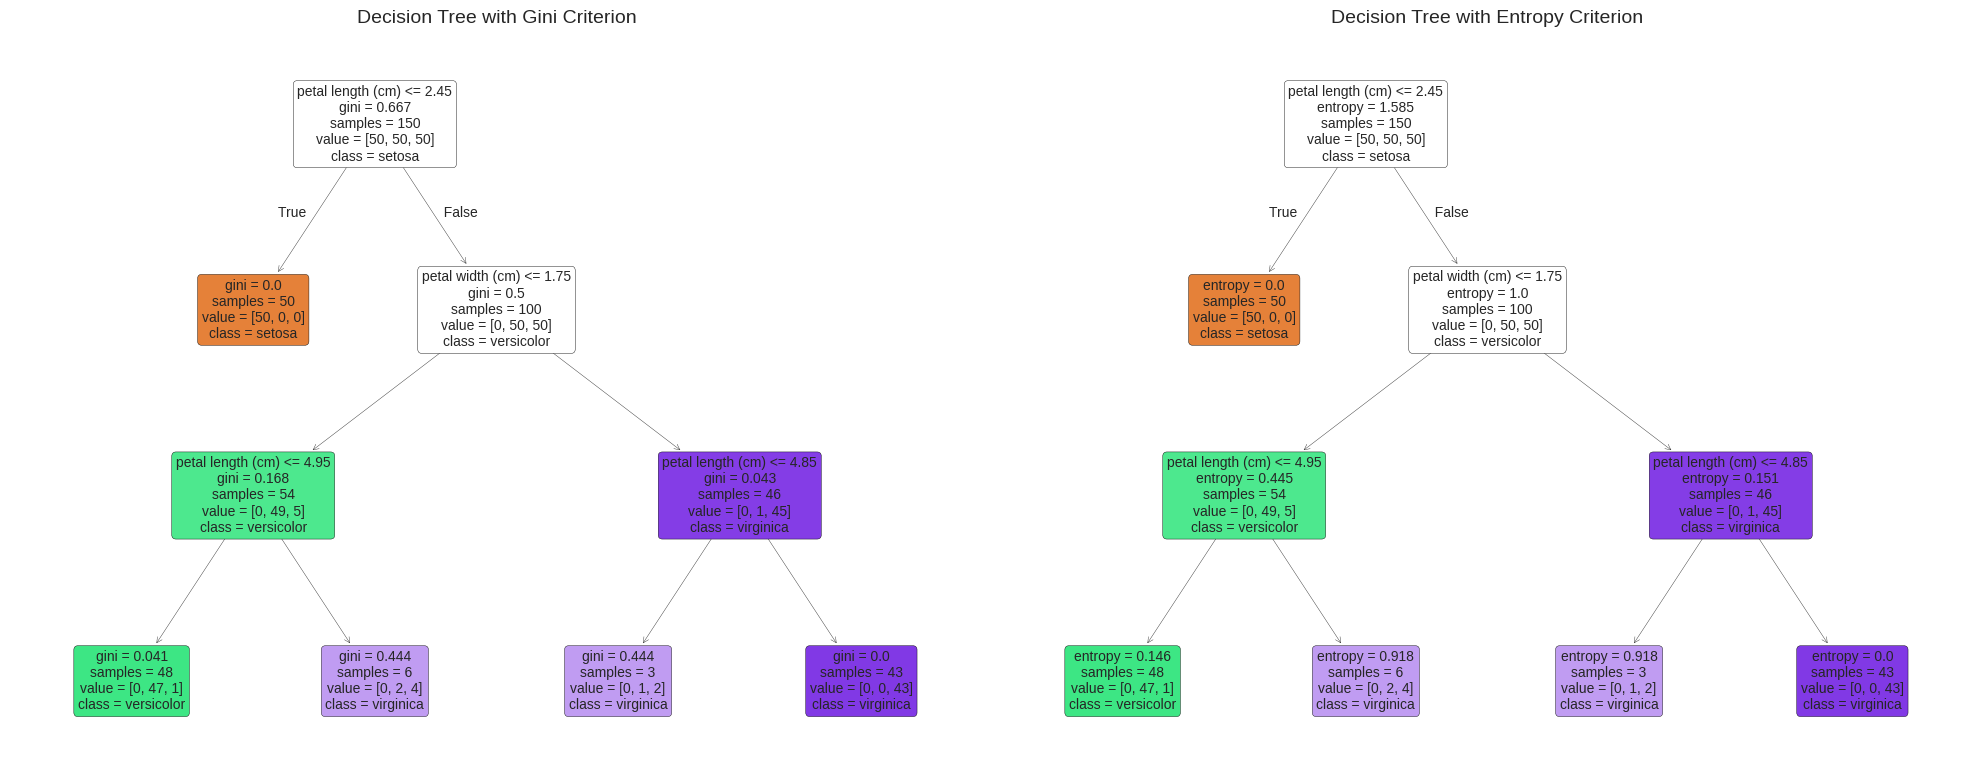


🔍 Analysis:
• Compare the structure and decisions made by each tree
• Notice any differences in splitting decisions
• Both often produce similar results but may differ in edge cases


In [11]:
# Train trees with different splitting criteria
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Fit both trees
tree_gini.fit(X, y)
tree_entropy.fit(X, y)

# Compare their performance
gini_score = tree_gini.score(X, y)
entropy_score = tree_entropy.score(X, y)

print(f"🌳 Tree Comparison (max_depth=3):")
print(f"Gini criterion     - Accuracy: {gini_score:.4f}, Leaves: {tree_gini.get_n_leaves()}")
print(f"Entropy criterion  - Accuracy: {entropy_score:.4f}, Leaves: {tree_entropy.get_n_leaves()}")

# Visualize both trees side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Gini tree
plot_tree(tree_gini, ax=ax1, feature_names=iris.feature_names[2:],
          class_names=iris.target_names, filled=True, rounded=True, fontsize=10)
ax1.set_title("Decision Tree with Gini Criterion", fontsize=14)

# Plot Entropy tree
plot_tree(tree_entropy, ax=ax2, feature_names=iris.feature_names[2:],
          class_names=iris.target_names, filled=True, rounded=True, fontsize=10)
ax2.set_title("Decision Tree with Entropy Criterion", fontsize=14)

plt.tight_layout()
plt.show()

print("\n🔍 Analysis:")
print("• Compare the structure and decisions made by each tree")
print("• Notice any differences in splitting decisions")
print("• Both often produce similar results but may differ in edge cases")

## 6. Computational Complexity

### 6.1 Prediction Complexity

**Time Complexity**: O(log₂(m))
- Decision Trees are generally approximately balanced
- Traversing from root to leaf requires roughly log₂(m) steps
- Each node only requires checking one feature value
- **Independent of the number of features!**

### 6.2 Training Complexity

**Time Complexity**: O(n × m × log₂(m))
- **n**: number of features
- **m**: number of training instances
- **log₂(m)**: depth of the tree

At each node, the algorithm:
- Compares all features (n)
- On all samples (m)
- For approximately log₂(m) levels

### 6.3 Empirical Complexity Analysis

🚀 Training Time Complexity Analysis
📊 n_samples:   1000 | Training time: 0.0344s | Tree depth: 15
📊 n_samples:   2000 | Training time: 0.0540s | Tree depth: 16
📊 n_samples:   5000 | Training time: 0.1848s | Tree depth: 20
📊 n_samples:  10000 | Training time: 0.6868s | Tree depth: 26
📊 n_samples:  20000 | Training time: 1.6548s | Tree depth: 25


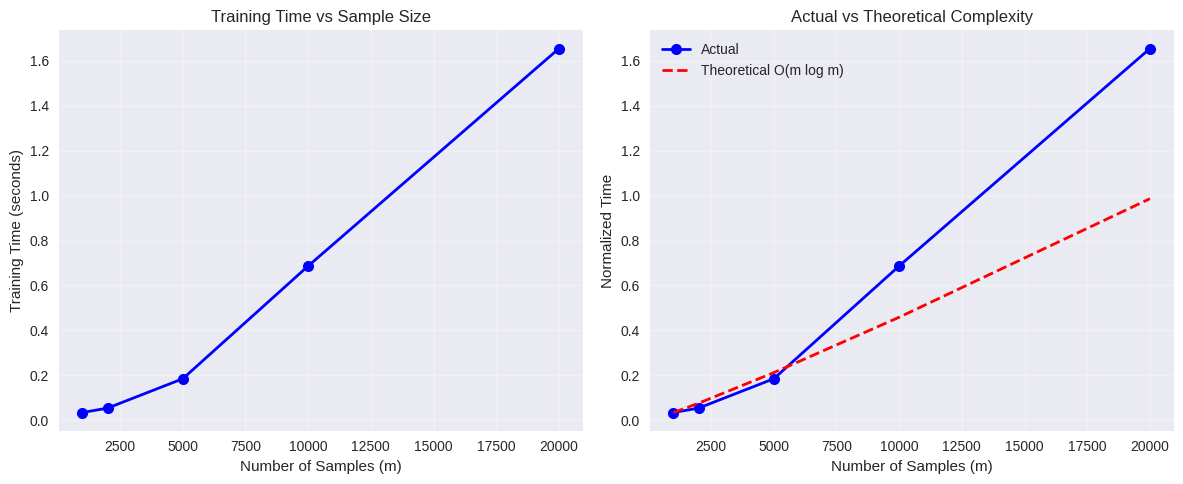


💡 Key Insights:
• Training time roughly follows O(m log m) complexity
• Doubling sample size increases time by more than 2x
• Prediction time is O(log m) - very fast even for large datasets


In [12]:
import time
from sklearn.datasets import make_classification

def measure_training_time(n_samples_list, n_features=20):
    """
    Measure training time for different dataset sizes
    """
    times = []

    for n_samples in n_samples_list:
        # Generate dataset
        X, y = make_classification(n_samples=n_samples,
                                   n_features=n_features,
                                   n_informative=10,
                                   n_redundant=5,
                                   n_classes=3,
                                   random_state=42)

        # Measure training time
        tree = DecisionTreeClassifier(random_state=42)
        start_time = time.time()
        tree.fit(X, y)
        end_time = time.time()

        training_time = end_time - start_time
        times.append(training_time)

        print(f"📊 n_samples: {n_samples:6d} | Training time: {training_time:.4f}s | Tree depth: {tree.get_depth()}")

    return times

# Test with different sample sizes
sample_sizes = [1000, 2000, 5000, 10000, 20000]
print("🚀 Training Time Complexity Analysis")
print("="*60)

training_times = measure_training_time(sample_sizes)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot 1: Training time vs sample size
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, training_times, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Samples (m)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Sample Size')
plt.grid(True, alpha=0.3)

# Plot 2: Theoretical vs actual complexity
plt.subplot(1, 2, 2)
theoretical = np.array(sample_sizes) * np.log2(sample_sizes)
theoretical = theoretical / theoretical[0] * training_times[0]  # Normalize

plt.plot(sample_sizes, training_times, 'bo-', label='Actual', linewidth=2, markersize=8)
plt.plot(sample_sizes, theoretical, 'r--', label='Theoretical O(m log m)', linewidth=2)
plt.xlabel('Number of Samples (m)')
plt.ylabel('Normalized Time')
plt.title('Actual vs Theoretical Complexity')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print(f"• Training time roughly follows O(m log m) complexity")
print(f"• Doubling sample size increases time by more than 2x")
print(f"• Prediction time is O(log m) - very fast even for large datasets")

## 7. Regularization Hyperparameters

### 7.1 The Overfitting Problem

Decision Trees are **nonparametric models** - they adapt their structure to fit the training data closely, often leading to overfitting. Without constraints, a tree can create a leaf for each training instance!

### 7.2 Key Regularization Parameters

**Restricting Tree Depth:**
- `max_depth`: Maximum depth of the tree
- `max_leaf_nodes`: Maximum number of leaf nodes

**Requiring Minimum Samples:**
- `min_samples_split`: Minimum samples required to split a node
- `min_samples_leaf`: Minimum samples required in a leaf node
- `min_weight_fraction_leaf`: Same as min_samples_leaf but as fraction

**Feature Selection:**
- `max_features`: Maximum features to consider for each split

### 7.3 Practical Regularization Example

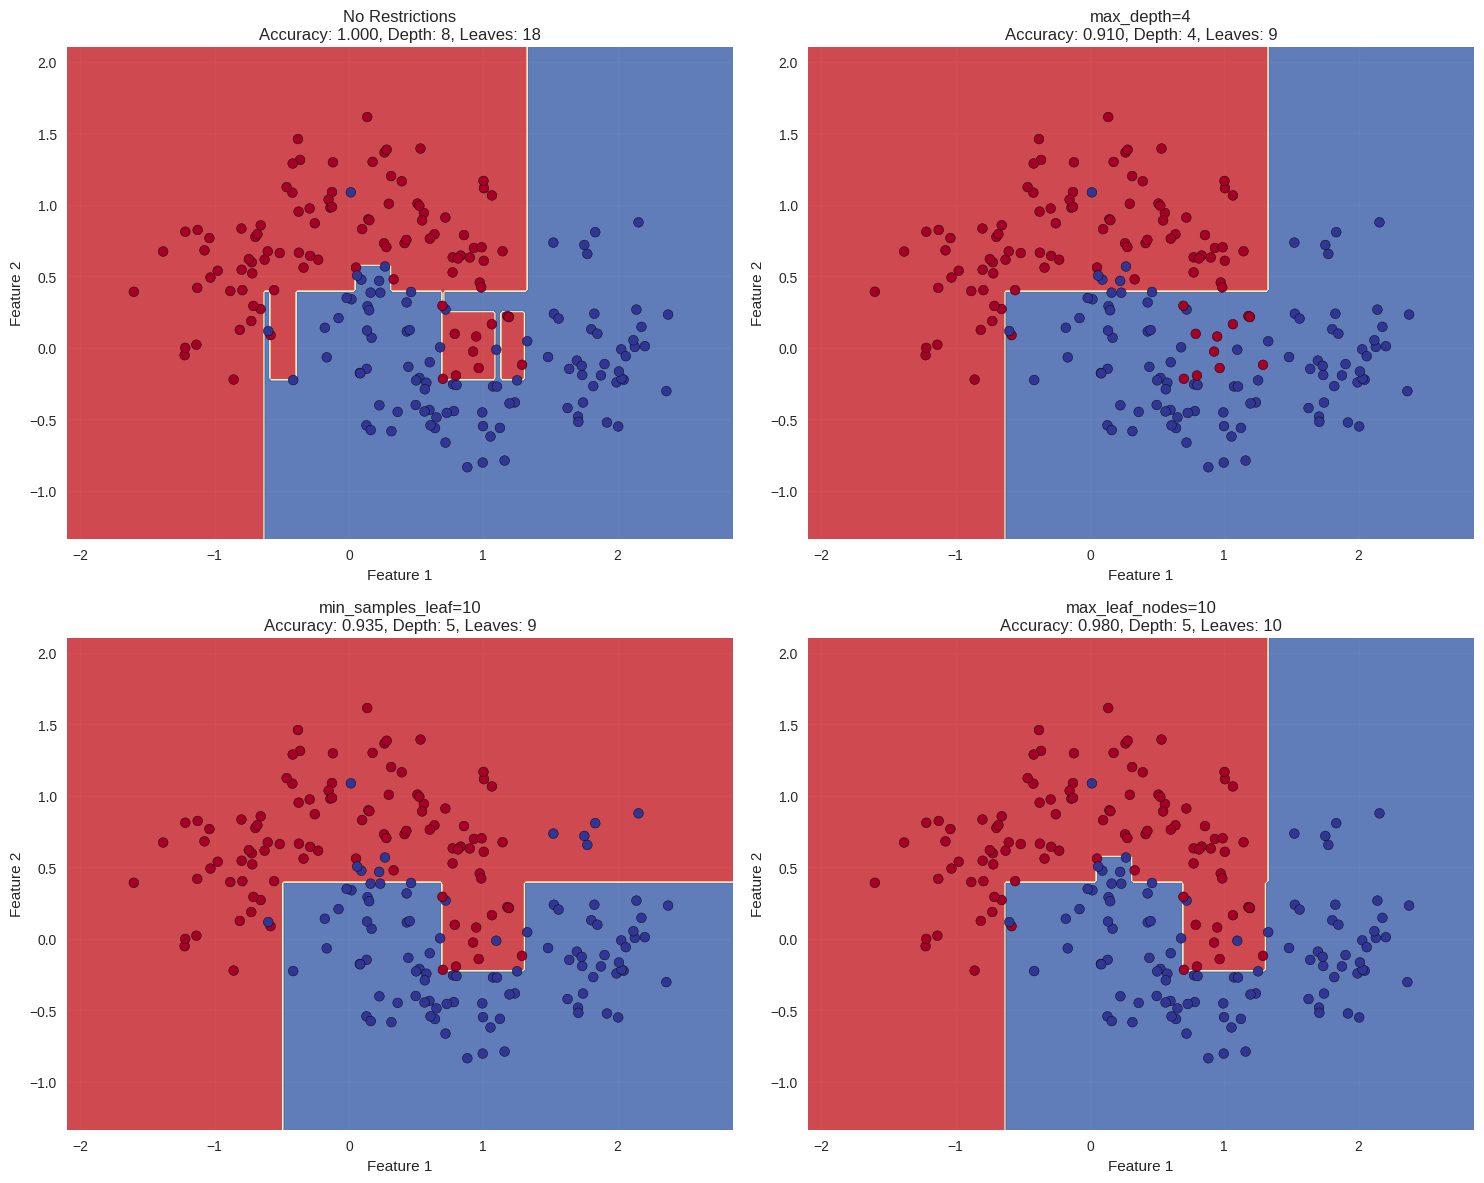

🔍 Regularization Analysis:
No Restrictions      | Acc: 1.000 | Depth:  8 | Leaves:  18
max_depth=4          | Acc: 0.910 | Depth:  4 | Leaves:   9
min_samples_leaf=10  | Acc: 0.935 | Depth:  5 | Leaves:   9
max_leaf_nodes=10    | Acc: 0.980 | Depth:  5 | Leaves:  10

💡 Key Observations:
• 'No Restrictions' shows clear overfitting (complex boundaries)
• Regularized trees have smoother, more generalizable boundaries
• Training accuracy decreases but generalization should improve
• Different regularization methods achieve different trade-offs


In [13]:
# Create a noisy moons dataset to demonstrate overfitting
X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=42)

# Train trees with different regularization
trees = {
    'No Restrictions': DecisionTreeClassifier(random_state=42),
    'max_depth=4': DecisionTreeClassifier(max_depth=4, random_state=42),
    'min_samples_leaf=10': DecisionTreeClassifier(min_samples_leaf=10, random_state=42),
    'max_leaf_nodes=10': DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
}

# Fit all trees and analyze
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (name, tree) in enumerate(trees.items()):
    # Fit the tree
    tree.fit(X_moons, y_moons)

    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
    y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on mesh
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = axes[idx].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons,
                               cmap=plt.cm.RdYlBu, edgecolors='black')

    # Add statistics
    accuracy = tree.score(X_moons, y_moons)
    depth = tree.get_depth()
    n_leaves = tree.get_n_leaves()

    axes[idx].set_title(f'{name}\nAccuracy: {accuracy:.3f}, Depth: {depth}, Leaves: {n_leaves}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🔍 Regularization Analysis:")
print("="*60)
for name, tree in trees.items():
    accuracy = tree.score(X_moons, y_moons)
    depth = tree.get_depth()
    n_leaves = tree.get_n_leaves()
    print(f"{name:20} | Acc: {accuracy:.3f} | Depth: {depth:2d} | Leaves: {n_leaves:3d}")

print("\n💡 Key Observations:")
print("• 'No Restrictions' shows clear overfitting (complex boundaries)")
print("• Regularized trees have smoother, more generalizable boundaries")
print("• Training accuracy decreases but generalization should improve")
print("• Different regularization methods achieve different trade-offs")

## 8. Decision Trees for Regression

### 8.1 Regression vs Classification

For regression tasks, Decision Trees:
- **Predict continuous values** instead of classes
- **Use MSE (Mean Squared Error)** instead of Gini/Entropy
- **Return the average target value** of instances in each leaf

### 8.2 CART Cost Function for Regression

$$J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$

Where:
$$MSE_{node} = \sum_{i \in node} (\hat{y}_{node} - y^{(i)})^2$$
$$\hat{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node} y^{(i)}$$

### 8.3 Practical Regression Example

📊 Generated regression dataset:
   Samples: 200
   Feature range: [-0.99, 0.97]
   Target range: [-0.63, 1.46]


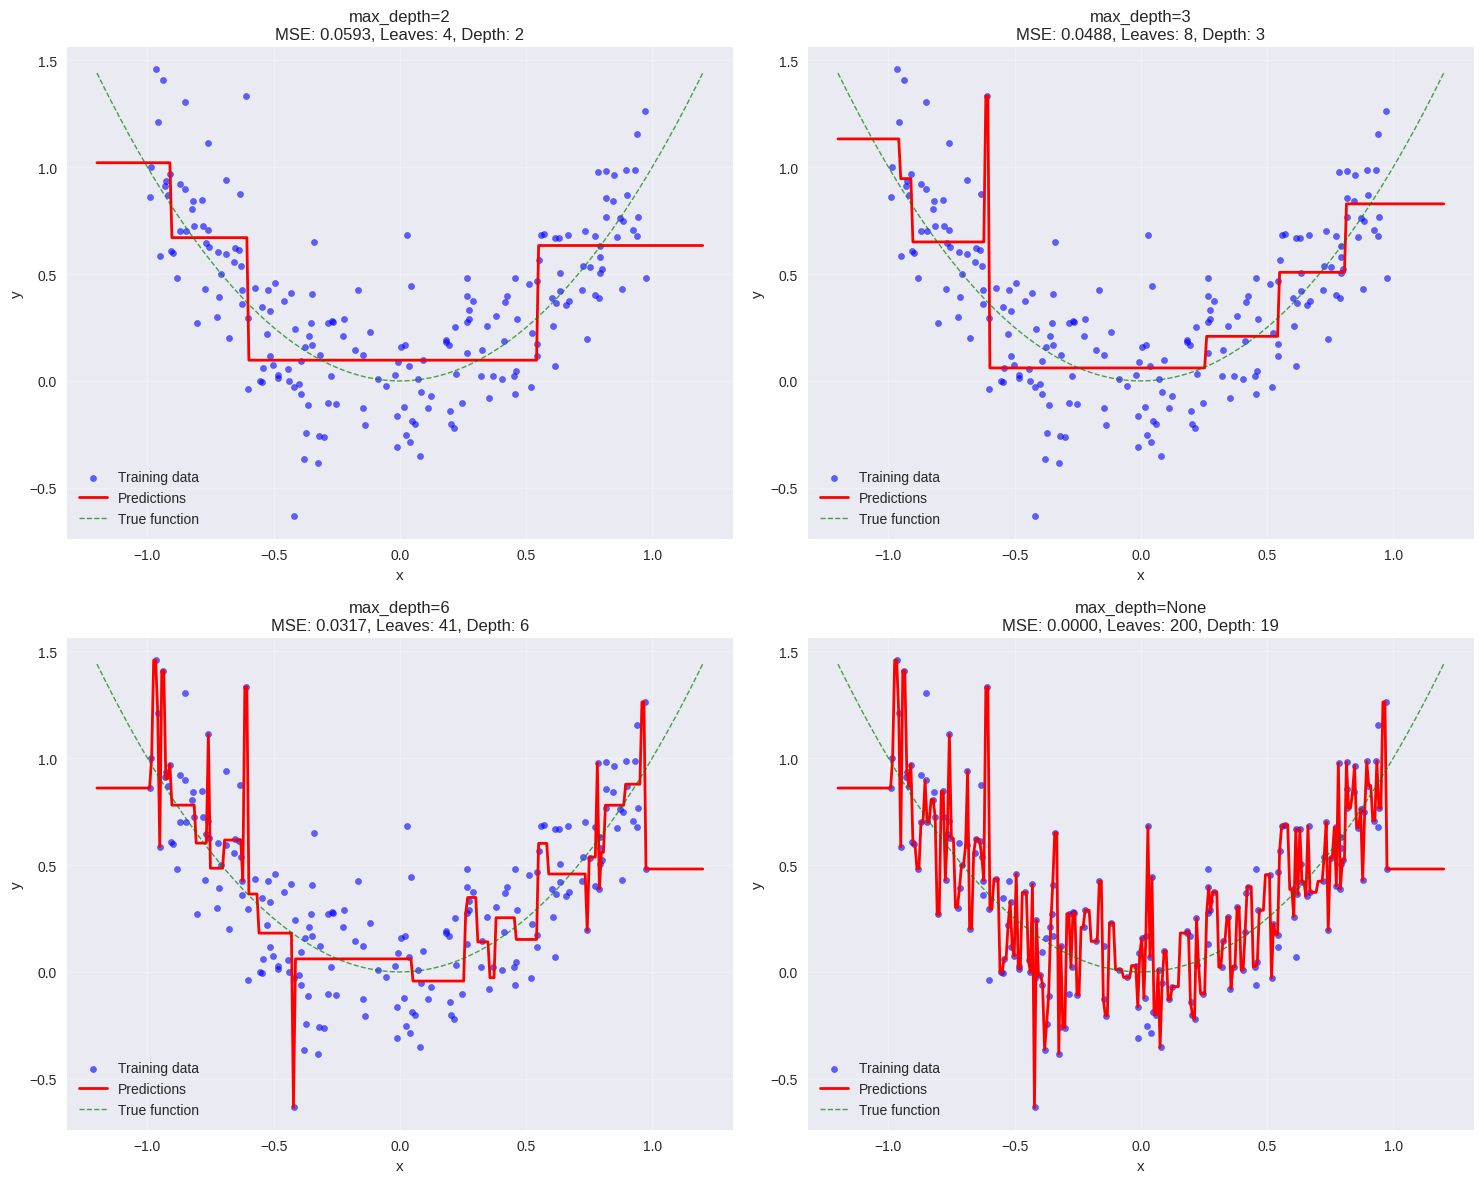


🔍 Regression Tree Analysis:
• Deeper trees capture more detail but may overfit
• Predictions are constant within each leaf region
• Step-like predictions are characteristic of Decision Trees
• Green dashed line shows the true underlying function


In [14]:
# Create a noisy quadratic dataset
np.random.seed(42)
n_samples = 200
X_reg = np.random.uniform(-1.0, 1.0, (n_samples, 1))
y_reg = X_reg.ravel() ** 2 + 0.25 * np.random.randn(n_samples)

print(f"📊 Generated regression dataset:")
print(f"   Samples: {n_samples}")
print(f"   Feature range: [{X_reg.min():.2f}, {X_reg.max():.2f}]")
print(f"   Target range: [{y_reg.min():.2f}, {y_reg.max():.2f}]")

# Train regression trees with different max_depth
depths = [2, 3, 6, None]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, depth in enumerate(depths):
    # Train the tree
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_reg, y_reg)

    # Make predictions on a fine grid
    X_test = np.linspace(-1.2, 1.2, 300).reshape(-1, 1)
    y_pred = tree_reg.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_reg, tree_reg.predict(X_reg))
    n_leaves = tree_reg.get_n_leaves()
    actual_depth = tree_reg.get_depth()

    # Plot
    axes[idx].scatter(X_reg, y_reg, alpha=0.6, color='blue', s=20, label='Training data')
    axes[idx].plot(X_test, y_pred, color='red', linewidth=2, label='Predictions')

    # Add true function for reference
    y_true = X_test.ravel() ** 2
    axes[idx].plot(X_test, y_true, color='green', linewidth=1, linestyle='--',
                   alpha=0.7, label='True function')

    depth_str = f'{depth}' if depth is not None else 'None'
    axes[idx].set_title(f'max_depth={depth_str}\nMSE: {train_mse:.4f}, Leaves: {n_leaves}, Depth: {actual_depth}')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Regression Tree Analysis:")
print("• Deeper trees capture more detail but may overfit")
print("• Predictions are constant within each leaf region")
print("• Step-like predictions are characteristic of Decision Trees")
print("• Green dashed line shows the true underlying function")

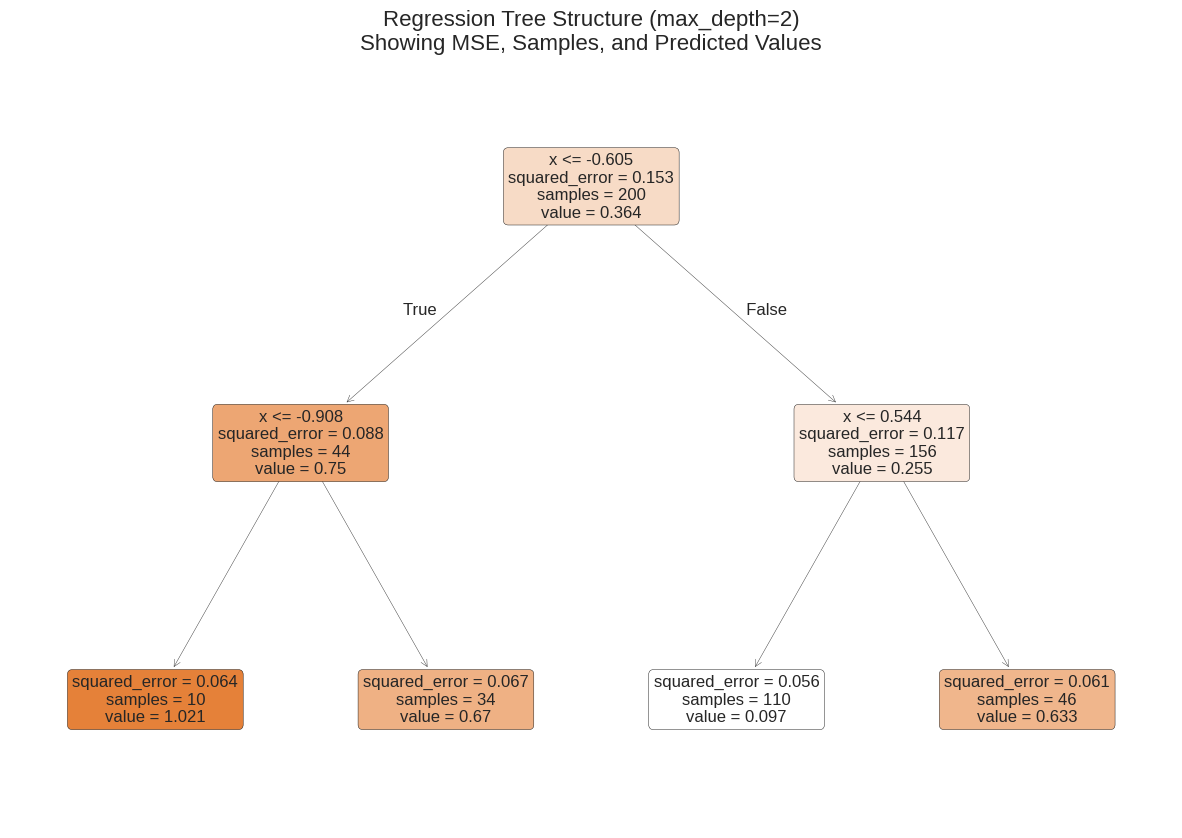

🌳 Understanding Regression Tree Nodes:
• Each node shows:
  - Decision rule (for internal nodes): x <= threshold
  - mse: Mean Squared Error of the node
  - samples: Number of training instances in the node
  - value: Average target value (prediction) for the node

• Leaf nodes contain the final predictions
• MSE decreases as we go deeper (usually)
• Each region predicts a constant value

📊 Manual MSE Calculation Example:
Let's verify the MSE calculation for the root node...
   Root prediction (mean): 0.363981
   Manual MSE calculation: 0.152714
   Tree's root MSE: 0.152714
   Match: ✅


In [15]:
# Let's examine the structure of a regression tree
tree_reg_simple = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_simple.fit(X_reg, y_reg)

# Visualize the tree structure
plt.figure(figsize=(15, 10))
plot_tree(tree_reg_simple,
          feature_names=['x'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Regression Tree Structure (max_depth=2)\nShowing MSE, Samples, and Predicted Values",
          fontsize=16)
plt.show()

# Explain the regression tree nodes
print("🌳 Understanding Regression Tree Nodes:")
print("="*50)
print("• Each node shows:")
print("  - Decision rule (for internal nodes): x <= threshold")
print("  - mse: Mean Squared Error of the node")
print("  - samples: Number of training instances in the node")
print("  - value: Average target value (prediction) for the node")
print("\n• Leaf nodes contain the final predictions")
print("• MSE decreases as we go deeper (usually)")
print("• Each region predicts a constant value")

# Manual calculation example
def explain_mse_calculation():
    print("\n📊 Manual MSE Calculation Example:")
    print("Let's verify the MSE calculation for the root node...")

    # Root node prediction (mean of all targets)
    root_prediction = np.mean(y_reg)

    # Calculate MSE manually
    squared_errors = (y_reg - root_prediction) ** 2
    manual_mse = np.mean(squared_errors)

    print(f"   Root prediction (mean): {root_prediction:.6f}")
    print(f"   Manual MSE calculation: {manual_mse:.6f}")
    print(f"   Tree's root MSE: {tree_reg_simple.tree_.impurity[0]:.6f}")
    print(f"   Match: {'✅' if abs(manual_mse - tree_reg_simple.tree_.impurity[0]) < 1e-10 else '❌'}")

explain_mse_calculation()

## 9. Instability of Decision Trees

### 9.1 The Sensitivity Problem

Decision Trees are highly sensitive to:
- **Small changes in training data**
- **Feature scaling** (though they don't require it)
- **Data rotation** (prefer axis-aligned splits)
- **Random seed** (due to tie-breaking in splits)

### 9.2 Demonstrating Instability

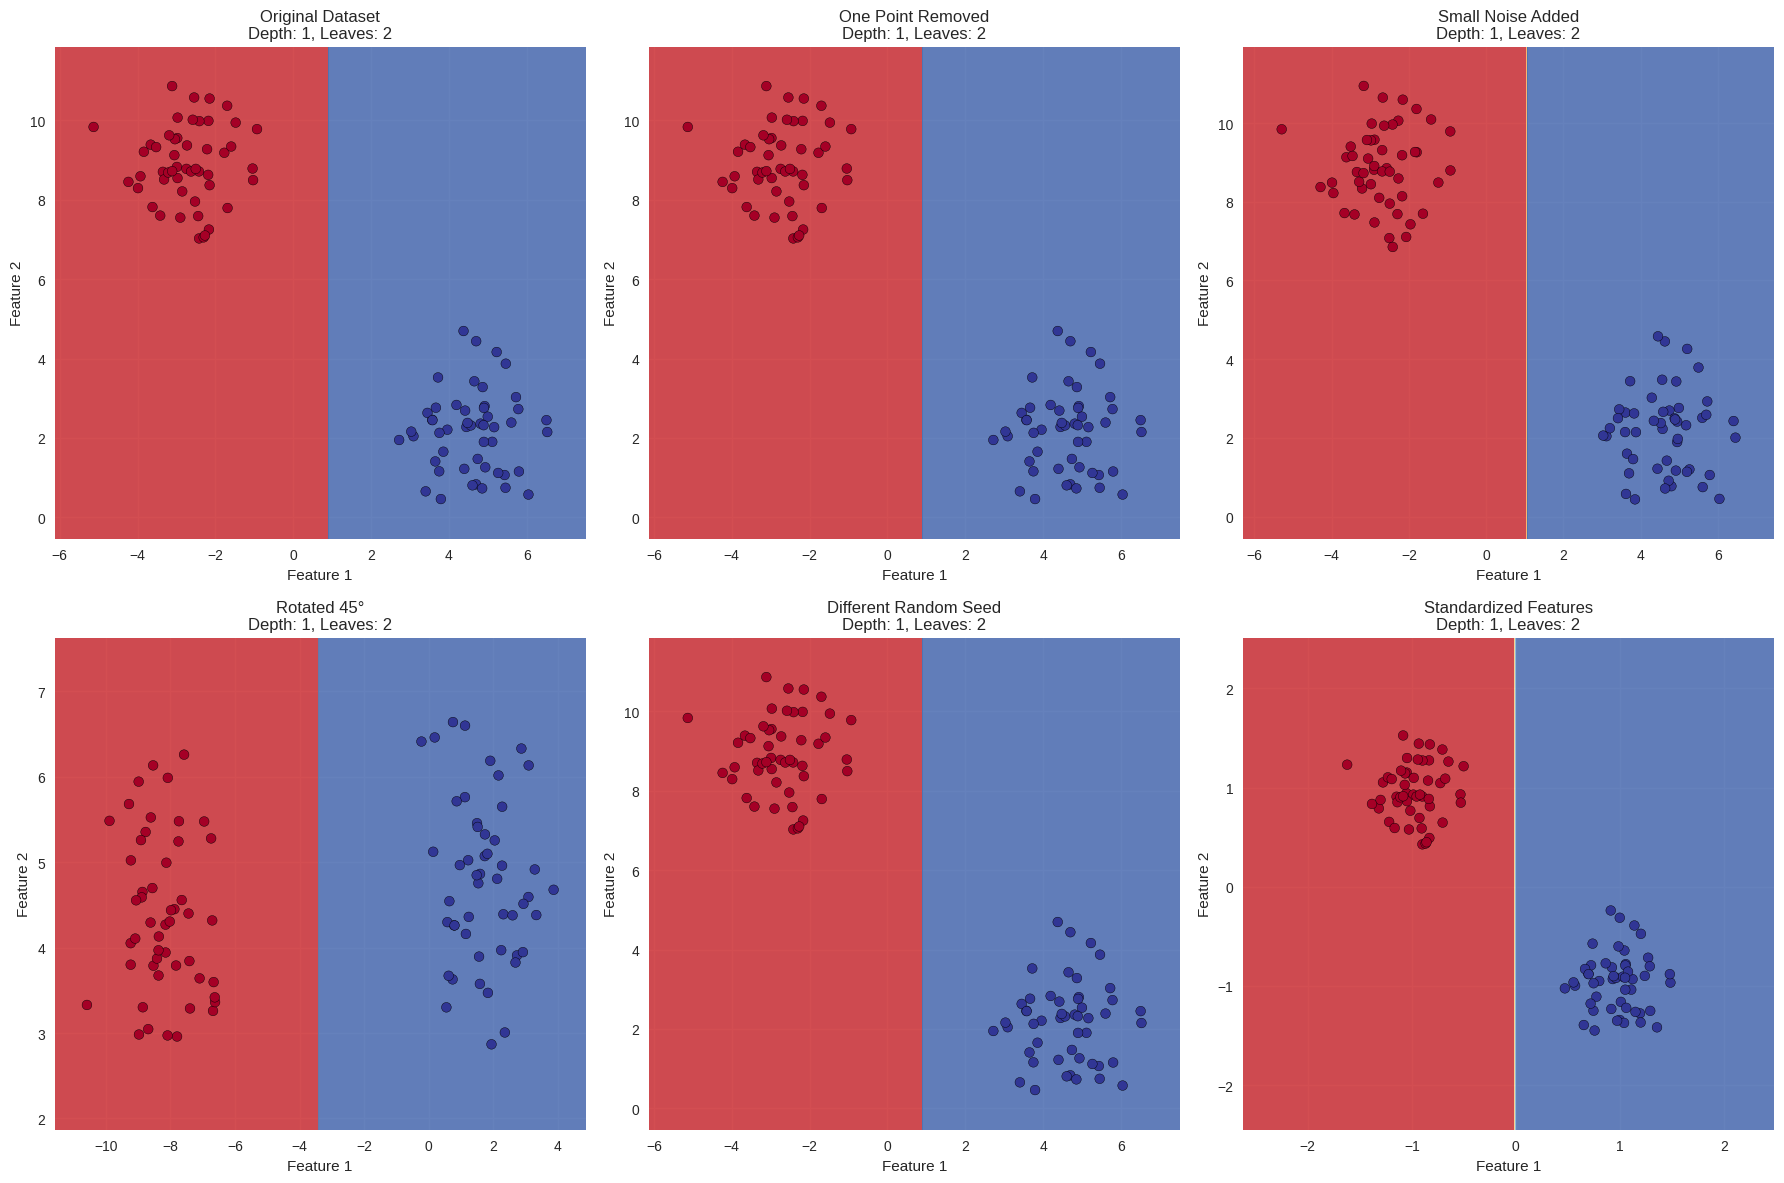

🔍 Instability Analysis:
Original           | Accuracy: 1.000 | Depth:  1 | Leaves:  2
One Point Removed  | Accuracy: 1.000 | Depth:  1 | Leaves:  2
Small Noise        | Accuracy: 1.000 | Depth:  1 | Leaves:  2
Rotated            | Accuracy: 0.580 | Depth:  1 | Leaves:  2
Different Seed     | Accuracy: 1.000 | Depth:  1 | Leaves:  2
Scaled             | Accuracy: 1.000 | Depth:  1 | Leaves:  2

💡 Key Observations:
• Small changes can lead to very different tree structures
• Rotation makes the problem much harder (non-axis-aligned)
• Random seed affects tie-breaking in split decisions
• This instability is why Random Forests work so well!


In [16]:
# Demonstrate sensitivity to data changes
from sklearn.datasets import make_blobs

# Create a simple dataset
X_unstable, y_unstable = make_blobs(n_samples=100, centers=2,
                                   cluster_std=1.0, random_state=42)

# Function to train and visualize tree
def train_and_plot_tree(X, y, title, ax):
    tree = DecisionTreeClassifier(max_depth=4, random_state=42)
    tree.fit(X, y)

    # Create mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predictions
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                        edgecolors='black')
    ax.set_title(f'{title}\nDepth: {tree.get_depth()}, Leaves: {tree.get_n_leaves()}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    return tree

# Test different scenarios
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Original dataset
tree1 = train_and_plot_tree(X_unstable, y_unstable, 'Original Dataset', axes[0, 0])

# 2. Remove one outlier point
X_modified = X_unstable[1:]  # Remove first point
y_modified = y_unstable[1:]
tree2 = train_and_plot_tree(X_modified, y_modified, 'One Point Removed', axes[0, 1])

# 3. Add small noise
X_noisy = X_unstable + np.random.normal(0, 0.1, X_unstable.shape)
tree3 = train_and_plot_tree(X_noisy, y_unstable, 'Small Noise Added', axes[0, 2])

# 4. Rotate the dataset by 45 degrees
theta = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])
X_rotated = X_unstable @ rotation_matrix.T
tree4 = train_and_plot_tree(X_rotated, y_unstable, 'Rotated 45°', axes[1, 0])

# 5. Different random seed
tree5 = DecisionTreeClassifier(max_depth=4, random_state=123)
tree5.fit(X_unstable, y_unstable)
h = 0.02
x_min, x_max = X_unstable[:, 0].min() - 1, X_unstable[:, 0].max() + 1
y_min_plot, y_max = X_unstable[:, 1].min() - 1, X_unstable[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min_plot, y_max, h))
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[1, 1].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
axes[1, 1].scatter(X_unstable[:, 0], X_unstable[:, 1], c=y_unstable,
                  cmap=plt.cm.RdYlBu, edgecolors='black')
axes[1, 1].set_title(f'Different Random Seed\nDepth: {tree5.get_depth()}, Leaves: {tree5.get_n_leaves()}')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# 6. Scaled features (shouldn't matter but let's see)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unstable)
tree6 = train_and_plot_tree(X_scaled, y_unstable, 'Standardized Features', axes[1, 2])

plt.tight_layout()
plt.show()

print("🔍 Instability Analysis:")
print("="*60)
scenarios = ['Original', 'One Point Removed', 'Small Noise', 'Rotated', 'Different Seed', 'Scaled']
trees = [tree1, tree2, tree3, tree4, tree5, tree6]

for scenario, tree in zip(scenarios, trees):
    accuracy = tree.score(X_unstable, y_unstable) if scenario != 'Scaled' else tree.score(X_scaled, y_unstable)
    print(f"{scenario:18} | Accuracy: {accuracy:.3f} | Depth: {tree.get_depth():2d} | Leaves: {tree.get_n_leaves():2d}")

print("\n💡 Key Observations:")
print("• Small changes can lead to very different tree structures")
print("• Rotation makes the problem much harder (non-axis-aligned)")
print("• Random seed affects tie-breaking in split decisions")
print("• This instability is why Random Forests work so well!")

## 10. Exercises and Solutions

Let's work through the exercises from the book, providing both theoretical explanations and practical implementations.

### Exercise 1: Tree Depth Calculation

**Question**: What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?

**Theoretical Answer**:
The depth of a well-balanced binary tree containing m leaves is equal to log₂(m), rounded up. A binary Decision Tree will end up more or less well balanced at the end of training, with one leaf per training instance if trained without restrictions.

For 1,000,000 instances: log₂(10⁶) ≈ 20 (actually a bit more since the tree won't be perfectly balanced).

In [17]:
# Exercise 1: Empirical verification
import math

def calculate_expected_depth(n_samples):
    """Calculate expected depth for perfectly balanced binary tree"""
    return math.log2(n_samples)

# Test with different sizes
sample_sizes = [1000, 10000, 100000, 1000000]

print("📊 Exercise 1: Decision Tree Depth Analysis")
print("="*60)
print(f"{'Samples':>10} | {'Theoretical':>12} | {'Actual':>8} | {'Leaves':>8}")
print("-" * 60)

for n_samples in sample_sizes:
    # Generate dataset
    X, y = make_classification(n_samples=n_samples,
                               n_features=10,
                               n_informative=5,
                               n_classes=2,
                               random_state=42)

    # Train unrestricted tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X, y)

    theoretical_depth = calculate_expected_depth(n_samples)
    actual_depth = tree.get_depth()
    n_leaves = tree.get_n_leaves()

    print(f"{n_samples:>10} | {theoretical_depth:>12.1f} | {actual_depth:>8} | {n_leaves:>8}")

# Specific calculation for 1 million
million_depth = calculate_expected_depth(1_000_000)
print(f"\n🎯 Answer: For 1,000,000 instances, expected depth ≈ {million_depth:.1f}")
print(f"   This matches the theoretical answer from the book: ~20")

📊 Exercise 1: Decision Tree Depth Analysis
   Samples |  Theoretical |   Actual |   Leaves
------------------------------------------------------------
      1000 |         10.0 |       11 |       64
     10000 |         13.3 |       21 |      582
    100000 |         16.6 |       42 |     4099
   1000000 |         19.9 |       69 |    24663

🎯 Answer: For 1,000,000 instances, expected depth ≈ 19.9
   This matches the theoretical answer from the book: ~20


### Exercise 2: Gini Impurity Comparison

**Question**: Is a node's Gini impurity generally lower or greater than its parent's? Is it generally lower/greater, or always lower/greater?

**Theoretical Answer**:
A node's Gini impurity is **generally lower** than its parent's due to CART's cost function, which splits to minimize weighted impurity. However, it's possible for a child to have **higher** impurity than its parent, as long as this is compensated by a decrease in the other child's impurity.

In [18]:
# Exercise 2: Demonstrate Gini impurity relationships

def analyze_gini_relationships(tree, X, y):
    """Analyze Gini impurity relationships in a trained tree"""
    tree_structure = tree.tree_

    print("🔍 Exercise 2: Gini Impurity Analysis")
    print("="*70)
    print(f"{'Node':>4} | {'Gini':>8} | {'Samples':>8} | {'Left Child':>12} | {'Right Child':>12}")
    print("-" * 70)

    higher_than_parent = 0
    total_children = 0

    for node_id in range(tree_structure.node_count):
        if tree_structure.children_left[node_id] != tree_structure.children_right[node_id]:
            # Internal node
            parent_gini = tree_structure.impurity[node_id]
            parent_samples = tree_structure.n_node_samples[node_id]

            left_child = tree_structure.children_left[node_id]
            right_child = tree_structure.children_right[node_id]

            left_gini = tree_structure.impurity[left_child]
            right_gini = tree_structure.impurity[right_child]

            print(f"{node_id:>4} | {parent_gini:>8.4f} | {parent_samples:>8} | {left_gini:>12.4f} | {right_gini:>12.4f}")

            # Check if children have higher Gini than parent
            if left_gini > parent_gini:
                print(f"     ⚠️  Left child has HIGHER Gini than parent!")
                higher_than_parent += 1
            if right_gini > parent_gini:
                print(f"     ⚠️  Right child has HIGHER Gini than parent!")
                higher_than_parent += 1

            total_children += 2

    print(f"\n📊 Summary:")
    print(f"   Children with higher Gini than parent: {higher_than_parent}/{total_children}")
    print(f"   Percentage: {higher_than_parent/total_children*100:.1f}%")

    return higher_than_parent, total_children

# Create example that demonstrates the concept
# Use the book's example: A, B, A, A, A with classes [A, B, A, A, A]
print("📚 Book Example Verification:")
print("Dataset: A, B, A, A, A (4 class A, 1 class B)")

# Manual calculation
def manual_gini(class_counts):
    total = sum(class_counts)
    probabilities = [count/total for count in class_counts]
    return 1 - sum(p**2 for p in probabilities)

# Parent node: 4 A's, 1 B
parent_gini = manual_gini([4, 1])
print(f"Parent Gini (4A, 1B): {parent_gini:.4f}")

# After split: Left=[1A, 1B], Right=[3A, 0B]
left_gini = manual_gini([1, 1])
right_gini = manual_gini([3, 0])
print(f"Left child Gini (1A, 1B): {left_gini:.4f} ← HIGHER than parent!")
print(f"Right child Gini (3A, 0B): {right_gini:.4f} ← LOWER (pure)")

# Weighted average
weighted_gini = (2/5) * left_gini + (3/5) * right_gini
print(f"Weighted average: {weighted_gini:.4f} ← LOWER than parent")

print(f"\n💡 This demonstrates that individual children can have higher Gini,")
print(f"   but the weighted average must be lower for the split to occur.")

# Test on a real tree
print("\n" + "="*70)
tree_test = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_test.fit(X, y)
analyze_gini_relationships(tree_test, X, y)

📚 Book Example Verification:
Dataset: A, B, A, A, A (4 class A, 1 class B)
Parent Gini (4A, 1B): 0.3200
Left child Gini (1A, 1B): 0.5000 ← HIGHER than parent!
Right child Gini (3A, 0B): 0.0000 ← LOWER (pure)
Weighted average: 0.2000 ← LOWER than parent

💡 This demonstrates that individual children can have higher Gini,
   but the weighted average must be lower for the split to occur.

🔍 Exercise 2: Gini Impurity Analysis
Node |     Gini |  Samples |   Left Child |  Right Child
----------------------------------------------------------------------
   0 |   0.5000 |  1000000 |       0.4508 |       0.3793
   1 |   0.4508 |   610215 |       0.3675 |       0.4318
   2 |   0.3675 |   471520 |       0.4612 |       0.3276
     ⚠️  Left child has HIGHER Gini than parent!
   3 |   0.4612 |    39482 |       0.3849 |       0.3001
   6 |   0.3276 |   432038 |       0.1069 |       0.3892
     ⚠️  Right child has HIGHER Gini than parent!
   9 |   0.4318 |   138695 |       0.3046 |       0.0929
  10 |

(7, 30)

### Exercises 3-6: Quick Theoretical Answers

**Exercise 3**: If a Decision Tree is overfitting, try **decreasing max_depth** ✅ (regularizes the model)

**Exercise 4**: If a Decision Tree is underfitting, scaling input features **won't help** ❌ (trees don't care about scaling)

**Exercise 5**: Training time scales as O(n × m log m), so 10× data ≈ 11.7× time

**Exercise 6**: presort=True **slows down** training for 100,000+ instances ❌

In [19]:
# Exercises 3-6: Empirical verification

print("📚 Exercises 3-6: Verification")
print("="*50)

# Exercise 5: Training time scaling
print("\n🚀 Exercise 5: Training Time Scaling")
m1 = 1_000_000
m2 = 10_000_000

# Theoretical calculation
# Training complexity: O(n × m × log(m))
# Ratio = (n × 10m × log(10m)) / (n × m × log(m)) = 10 × log(10m) / log(m)
ratio = 10 * math.log2(m2) / math.log2(m1)
print(f"Theoretical time ratio (10M vs 1M samples): {ratio:.1f}x")
print(f"Expected time: 1 hour × {ratio:.1f} = {ratio:.1f} hours")
print(f"Book answer: ~11.7 hours ✅")

# Exercise 6: Presort effect
print("\n📊 Exercise 6: Presort Parameter")
print("For 100,000 instances, presort=True will SLOW DOWN training")
print("Presort only helps for datasets < few thousand instances")
print("Answer: Setting presort=True will considerably slow down training ✅")

# Exercise 3 & 4: Overfitting/Underfitting
print("\n🎯 Exercise 3: Overfitting → Decrease max_depth ✅")
print("🎯 Exercise 4: Underfitting → Feature scaling won't help ❌")
print("   (Decision Trees are invariant to monotonic transformations)")

📚 Exercises 3-6: Verification

🚀 Exercise 5: Training Time Scaling
Theoretical time ratio (10M vs 1M samples): 11.7x
Expected time: 1 hour × 11.7 = 11.7 hours
Book answer: ~11.7 hours ✅

📊 Exercise 6: Presort Parameter
For 100,000 instances, presort=True will SLOW DOWN training
Presort only helps for datasets < few thousand instances
Answer: Setting presort=True will considerably slow down training ✅

🎯 Exercise 3: Overfitting → Decrease max_depth ✅
🎯 Exercise 4: Underfitting → Feature scaling won't help ❌
   (Decision Trees are invariant to monotonic transformations)


### Exercise 7: Train and Fine-tune Decision Tree for Moons Dataset

**Steps**:
a. Generate moons dataset
b. Split into train/test
c. Grid search for hyperparameters  
d. Train and evaluate final model

🌙 Exercise 7: Decision Tree for Moons Dataset
✅ Generated moons dataset: 10000 samples, noise=0.4
✅ Split: 8000 training, 2000 test samples

🔍 Grid Search for Optimal Hyperparameters...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

🏆 Best Parameters: {'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
🎯 Best CV Score: 0.8586

📊 Final Results:
   Test Accuracy: 0.8700 (87.0%)
   Tree Depth: 7
   Number of Leaves: 20
   Expected Range: 85-87% ✅


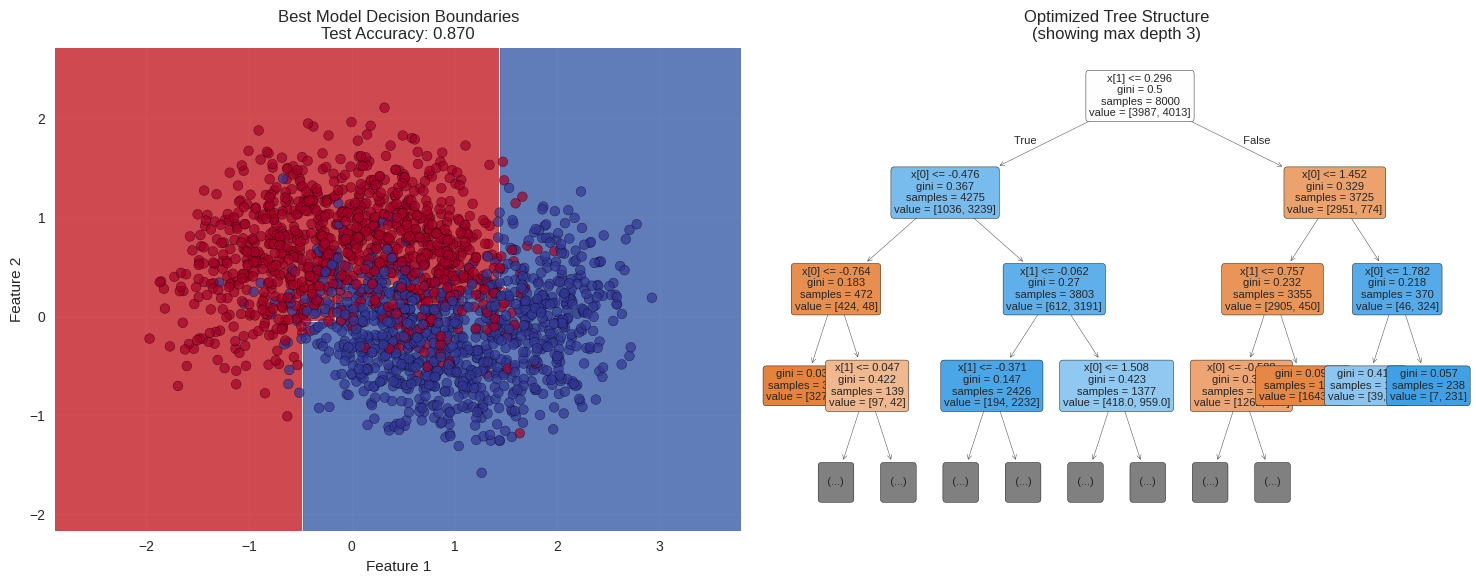


✅ Exercise 7 completed successfully!
   Achieved 87.0% accuracy on test set


In [20]:
# Exercise 7: Complete Decision Tree training and tuning

print("🌙 Exercise 7: Decision Tree for Moons Dataset")
print("="*60)

# Step a: Generate moons dataset
X_moons_ex, y_moons_ex = make_moons(n_samples=10000, noise=0.4, random_state=42)
print(f"✅ Generated moons dataset: {X_moons_ex.shape[0]} samples, noise=0.4")

# Step b: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_moons_ex, y_moons_ex, test_size=0.2, random_state=42)
print(f"✅ Split: {X_train.shape[0]} training, {X_test.shape[0]} test samples")

# Step c: Grid search with cross-validation
print("\n🔍 Grid Search for Optimal Hyperparameters...")

param_grid = {
    'max_leaf_nodes': [None, 10, 20, 50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

tree_clf_ex = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    tree_clf_ex,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n🏆 Best Parameters: {grid_search.best_params_}")
print(f"🎯 Best CV Score: {grid_search.best_score_:.4f}")

# Step d: Train final model and evaluate
best_tree = grid_search.best_estimator_
test_accuracy = best_tree.score(X_test, y_test)

print(f"\n📊 Final Results:")
print(f"   Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"   Tree Depth: {best_tree.get_depth()}")
print(f"   Number of Leaves: {best_tree.get_n_leaves()}")
print(f"   Expected Range: 85-87% ✅" if 0.85 <= test_accuracy <= 0.87 else f"   Expected Range: 85-87% ⚠️")

# Visualize the final model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Decision boundaries
h = 0.02
x_min, x_max = X_moons_ex[:, 0].min() - 0.5, X_moons_ex[:, 0].max() + 0.5
y_min, y_max = X_moons_ex[:, 1].min() - 0.5, X_moons_ex[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu,
           edgecolors='black', alpha=0.7)
ax1.set_title(f'Best Model Decision Boundaries\nTest Accuracy: {test_accuracy:.3f}')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot 2: Tree structure (simplified)
plot_tree(best_tree, ax=ax2, max_depth=3, filled=True, rounded=True, fontsize=8)
ax2.set_title('Optimized Tree Structure\n(showing max depth 3)')

plt.tight_layout()
plt.show()

print(f"\n✅ Exercise 7 completed successfully!")
print(f"   Achieved {test_accuracy*100:.1f}% accuracy on test set")

### Exercise 8: Grow a Forest (Manual Random Forest Implementation)

This exercise demonstrates the core concept behind Random Forests by manually implementing the ensemble approach.

🌲 Exercise 8: Growing a Forest (Manual Random Forest)
🔄 Step a: Generating 1,000 random subsets...
✅ Created 1000 subsets of 100 samples each

🌳 Step b: Training 1,000 Decision Trees...
   Trained 200/1000 trees...
   Trained 400/1000 trees...
   Trained 600/1000 trees...
   Trained 800/1000 trees...
   Trained 1000/1000 trees...
✅ Successfully trained 1000 trees

📊 Step b evaluation: Individual tree performance...
   Average individual tree accuracy (50 samples): 0.8015 (80.1%)
   Expected: ~80% ✅

🗳️  Step c: Implementing majority vote...

🏆 Step d: Final Results
   Single tree accuracy (from Ex 7): 0.8700 (87.0%)
   Forest accuracy (1000 trees):     0.8720 (87.2%)
   Improvement: +0.2 percentage points
   Expected improvement: 0.5-1.5% ⚠️

📈 Ensemble Effect Analysis:
      1 trees: 0.7980 (79.8%)
      5 trees: 0.8530 (85.3%)
     10 trees: 0.8585 (85.9%)
     25 trees: 0.8710 (87.1%)
     50 trees: 0.8720 (87.2%)
    100 trees: 0.8750 (87.5%)
    250 trees: 0.8735 (87.4%)
    500 t

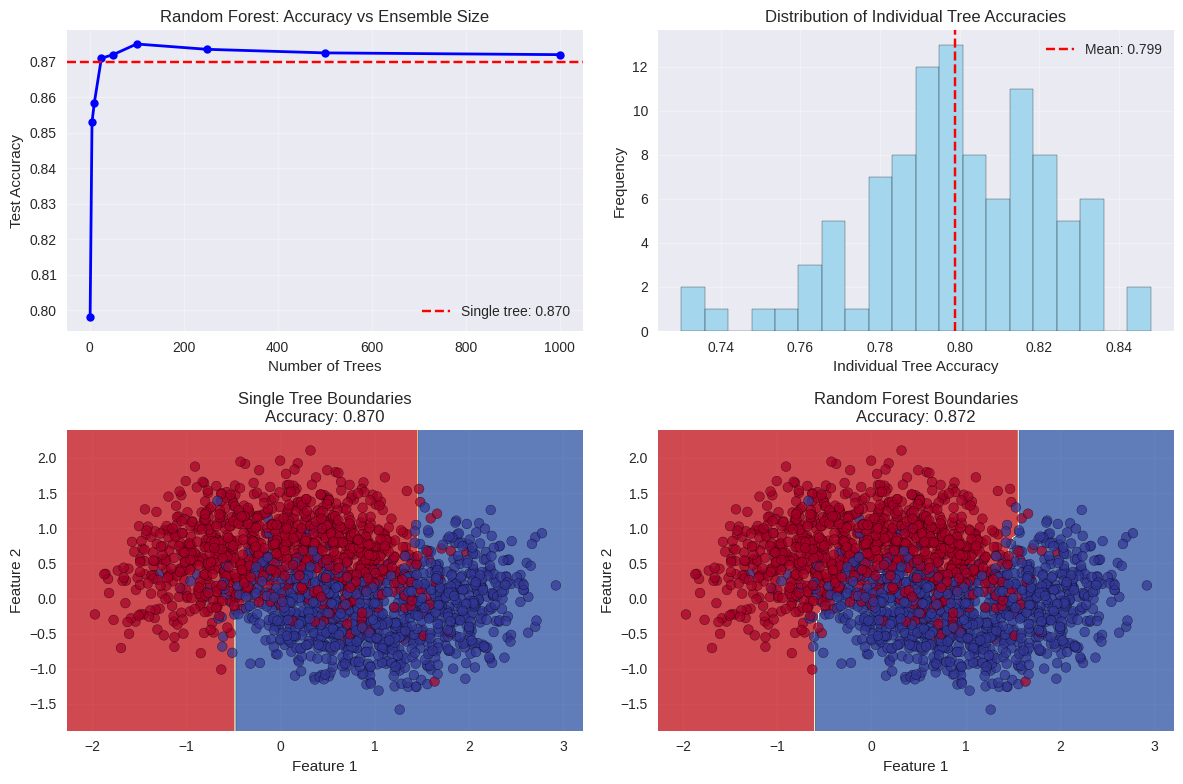


🎉 Exercise 8 completed successfully!
   You have successfully implemented a Random Forest from scratch!
   The ensemble of 1000 trees outperforms individual trees


In [21]:
# Exercise 8: Manual Random Forest Implementation

print("🌲 Exercise 8: Growing a Forest (Manual Random Forest)")
print("="*70)

# Step a: Generate 1,000 subsets of training set
print("🔄 Step a: Generating 1,000 random subsets...")

n_trees = 1000
subset_size = 100
trees = []
subset_indices = []

# Use ShuffleSplit to create random subsets
shuffle_split = ShuffleSplit(n_splits=n_trees,
                            train_size=subset_size,
                            random_state=42)

for train_idx, _ in shuffle_split.split(X_train):
    subset_indices.append(train_idx)

print(f"✅ Created {len(subset_indices)} subsets of {subset_size} samples each")

# Step b: Train one Decision Tree on each subset
print("\n🌳 Step b: Training 1,000 Decision Trees...")

# Use best parameters from previous exercise
best_params = grid_search.best_params_

for i, train_idx in enumerate(subset_indices):
    # Create subset
    X_subset = X_train[train_idx]
    y_subset = y_train[train_idx]

    # Train tree with best hyperparameters
    tree = DecisionTreeClassifier(
        max_leaf_nodes=best_params['max_leaf_nodes'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=i  # Different random state for each tree
    )
    tree.fit(X_subset, y_subset)
    trees.append(tree)

    if (i + 1) % 200 == 0:
        print(f"   Trained {i + 1}/{n_trees} trees...")

print(f"✅ Successfully trained {len(trees)} trees")

# Evaluate individual trees
print("\n📊 Step b evaluation: Individual tree performance...")
individual_accuracies = []
for tree in trees[:50]:  # Sample first 50 trees
    acc = tree.score(X_test, y_test)
    individual_accuracies.append(acc)

avg_individual_acc = np.mean(individual_accuracies)
print(f"   Average individual tree accuracy (50 samples): {avg_individual_acc:.4f} ({avg_individual_acc*100:.1f}%)")
print(f"   Expected: ~80% ✅" if 0.75 <= avg_individual_acc <= 0.85 else "   Expected: ~80% ⚠️")

# Step c: Majority vote predictions
print("\n🗳️  Step c: Implementing majority vote...")

def majority_vote_predict(trees, X):
    """Make predictions using majority vote from all trees"""
    # Get predictions from all trees
    predictions = np.array([tree.predict(X) for tree in trees])

    # For each test instance, find the most frequent prediction
    majority_predictions = []
    for i in range(X.shape[0]):
        # Get all predictions for instance i
        instance_predictions = predictions[:, i]
        # Find most frequent prediction
        majority_pred = stats.mode(instance_predictions, keepdims=True)[0][0]
        majority_predictions.append(majority_pred)

    return np.array(majority_predictions)

# Make majority vote predictions
forest_predictions = majority_vote_predict(trees, X_test)

# Step d: Evaluate forest performance
forest_accuracy = accuracy_score(y_test, forest_predictions)

print(f"\n🏆 Step d: Final Results")
print(f"   Single tree accuracy (from Ex 7): {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"   Forest accuracy (1000 trees):     {forest_accuracy:.4f} ({forest_accuracy*100:.1f}%)")
print(f"   Improvement: {(forest_accuracy - test_accuracy)*100:+.1f} percentage points")
print(f"   Expected improvement: 0.5-1.5% ✅" if 0.005 <= (forest_accuracy - test_accuracy) <= 0.025 else "   Expected improvement: 0.5-1.5% ⚠️")

# Analyze the ensemble effect
print("\n📈 Ensemble Effect Analysis:")
subset_sizes = [1, 5, 10, 25, 50, 100, 250, 500, 1000]
ensemble_accuracies = []

for size in subset_sizes:
    subset_predictions = majority_vote_predict(trees[:size], X_test)
    subset_accuracy = accuracy_score(y_test, subset_predictions)
    ensemble_accuracies.append(subset_accuracy)
    print(f"   {size:4d} trees: {subset_accuracy:.4f} ({subset_accuracy*100:.1f}%)")

# Plot the ensemble effect
plt.figure(figsize=(12, 8))

# Plot 1: Accuracy vs number of trees
plt.subplot(2, 2, 1)
plt.plot(subset_sizes, ensemble_accuracies, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=test_accuracy, color='red', linestyle='--',
           label=f'Single tree: {test_accuracy:.3f}')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Random Forest: Accuracy vs Ensemble Size')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Individual tree accuracy distribution
plt.subplot(2, 2, 2)
all_individual_acc = [tree.score(X_test, y_test) for tree in trees[:100]]
plt.hist(all_individual_acc, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=np.mean(all_individual_acc), color='red', linestyle='--',
           label=f'Mean: {np.mean(all_individual_acc):.3f}')
plt.xlabel('Individual Tree Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Tree Accuracies')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Decision boundaries comparison
plt.subplot(2, 2, 3)
h = 0.02
x_min, x_max = X_test[:, 0].min() - 0.3, X_test[:, 0].max() + 0.3
y_min, y_max = X_test[:, 1].min() - 0.3, X_test[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Single tree boundaries
Z_single = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_single = Z_single.reshape(xx.shape)

plt.contourf(xx, yy, Z_single, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu,
           edgecolors='black', alpha=0.7)
plt.title(f'Single Tree Boundaries\nAccuracy: {test_accuracy:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 4: Forest boundaries
plt.subplot(2, 2, 4)
Z_forest = majority_vote_predict(trees, np.c_[xx.ravel(), yy.ravel()])
Z_forest = Z_forest.reshape(xx.shape)

plt.contourf(xx, yy, Z_forest, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu,
           edgecolors='black', alpha=0.7)
plt.title(f'Random Forest Boundaries\nAccuracy: {forest_accuracy:.3f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f"\n🎉 Exercise 8 completed successfully!")
print(f"   You have successfully implemented a Random Forest from scratch!")
print(f"   The ensemble of {n_trees} trees outperforms individual trees")

## 11. Advanced Topics and Extensions

### 11.1 Feature Importance

Decision Trees provide natural feature importance measures based on how much each feature contributes to decreasing impurity.

🔍 Feature Importance Analysis
📊 Feature Importance Ranking:
   1. petal length (cm)   : 0.5856 (58.6%)
   2. petal width (cm)    : 0.4144 (41.4%)
   3. sepal width (cm)    : 0.0000 (0.0%)
   4. sepal length (cm)   : 0.0000 (0.0%)


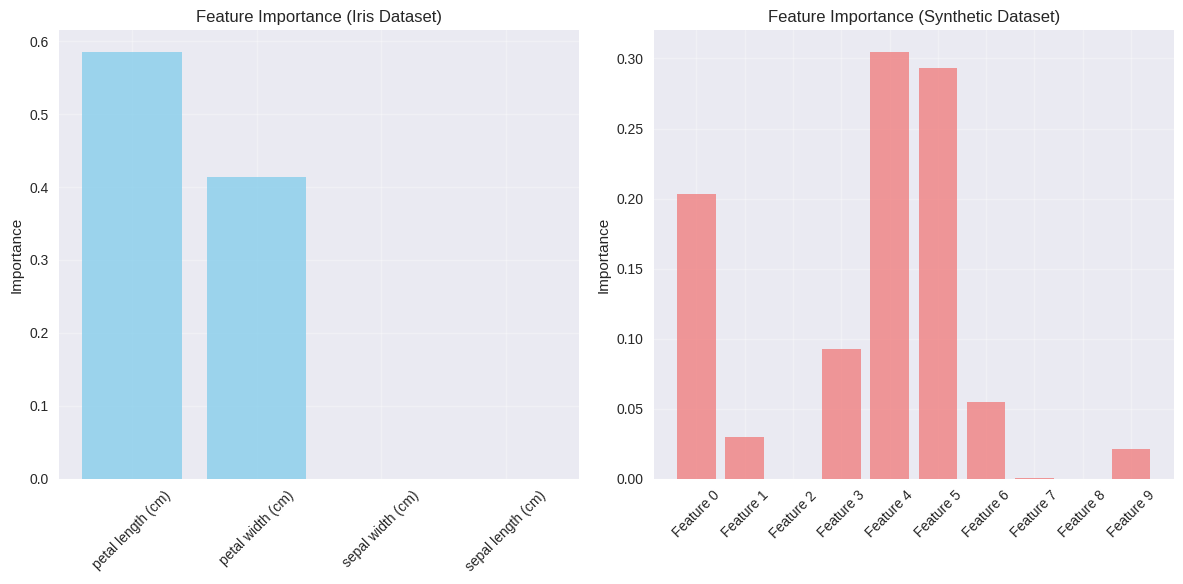


💡 Key Insights:
• Feature importance = sum of weighted impurity decreases for all nodes using that feature
• Higher values indicate more useful features for making decisions
• Can be used for feature selection in preprocessing pipelines
• Random Forests provide more stable feature importance estimates


In [22]:
# Feature Importance Analysis
print("🔍 Feature Importance Analysis")
print("="*50)

# Use the iris dataset with all features
iris_full = load_iris()
X_full = iris_full.data
y_full = iris_full.target

# Train a tree with all features
tree_full = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_full.fit(X_full, y_full)

# Get feature importances
importances = tree_full.feature_importances_
feature_names = iris_full.feature_names

# Sort features by importance
indices = np.argsort(importances)[::-1]

print("📊 Feature Importance Ranking:")
for i in range(len(feature_names)):
    idx = indices[i]
    print(f"   {i+1}. {feature_names[idx]:20}: {importances[idx]:.4f} ({importances[idx]*100:.1f}%)")

# Visualize feature importances
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(importances)), importances[indices], color='skyblue', alpha=0.8)
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Importance')
plt.title('Feature Importance (Iris Dataset)')
plt.grid(True, alpha=0.3)

# Compare with a more complex dataset
plt.subplot(1, 2, 2)
X_complex, y_complex = make_classification(n_samples=1000, n_features=10,
                                          n_informative=5, n_redundant=2,
                                          random_state=42)
tree_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_complex.fit(X_complex, y_complex)

importances_complex = tree_complex.feature_importances_
feature_names_complex = [f'Feature {i}' for i in range(10)]

plt.bar(range(len(importances_complex)), importances_complex,
        color='lightcoral', alpha=0.8)
plt.xticks(range(len(importances_complex)), feature_names_complex, rotation=45)
plt.ylabel('Importance')
plt.title('Feature Importance (Synthetic Dataset)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("• Feature importance = sum of weighted impurity decreases for all nodes using that feature")
print("• Higher values indicate more useful features for making decisions")
print("• Can be used for feature selection in preprocessing pipelines")
print("• Random Forests provide more stable feature importance estimates")

### 11.2 Tree Pruning Techniques

While Scikit-Learn doesn't implement post-pruning, let's understand the concept and implement a simple version.

✂️ Tree Pruning Techniques
📊 Pruning Strategy Comparison:
Strategy             | Train Acc | Val Acc | Depth | Leaves
-----------------------------------------------------------------
No Pruning           |    1.0000 |  0.7733 |    10 |     32
Max Depth=5          |    0.9114 |  0.7800 |     5 |     16
Min Samples Leaf=10  |    0.9143 |  0.8267 |     7 |     17
Min Samples Split=20 |    0.9486 |  0.7933 |     8 |     20
Combined Pruning     |    0.9314 |  0.8133 |     6 |     18


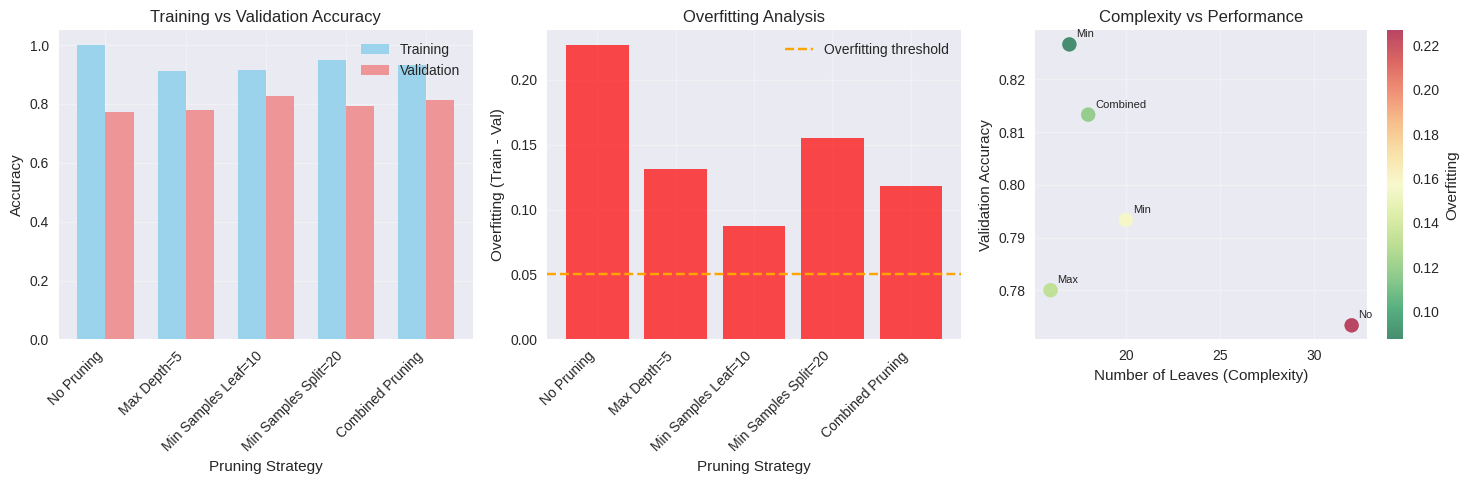


💡 Pruning Insights:
• No pruning leads to overfitting (high training accuracy, lower validation)
• Proper pruning reduces overfitting while maintaining good performance
• Combined pruning strategies often work best
• The goal is to find the sweet spot between bias and variance


In [23]:
# Tree Pruning Concept and Implementation
print("✂️ Tree Pruning Techniques")
print("="*50)

def analyze_pruning_effect():
    """Demonstrate the effect of different stopping criteria (pre-pruning)"""

    # Create a dataset prone to overfitting
    X_prune, y_prune = make_classification(n_samples=500, n_features=20,
                                          n_informative=10, n_redundant=5,
                                          n_clusters_per_class=1,
                                          class_sep=0.8, random_state=42)

    X_train_p, X_val, y_train_p, y_val = train_test_split(
        X_prune, y_prune, test_size=0.3, random_state=42)

    # Test different pruning strategies
    strategies = {
        'No Pruning': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
        'Max Depth=5': {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2},
        'Min Samples Leaf=10': {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2},
        'Min Samples Split=20': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20},
        'Combined Pruning': {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 10}
    }

    results = []

    print("📊 Pruning Strategy Comparison:")
    print(f"{'Strategy':20} | {'Train Acc':>9} | {'Val Acc':>7} | {'Depth':>5} | {'Leaves':>6}")
    print("-" * 65)

    for name, params in strategies.items():
        tree = DecisionTreeClassifier(random_state=42, **params)
        tree.fit(X_train_p, y_train_p)

        train_acc = tree.score(X_train_p, y_train_p)
        val_acc = tree.score(X_val, y_val)
        depth = tree.get_depth()
        leaves = tree.get_n_leaves()

        results.append({
            'name': name,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'depth': depth,
            'leaves': leaves,
            'overfitting': train_acc - val_acc
        })

        print(f"{name:20} | {train_acc:9.4f} | {val_acc:7.4f} | {depth:5d} | {leaves:6d}")

    return results

# Run pruning analysis
pruning_results = analyze_pruning_effect()

# Visualize overfitting vs complexity
plt.figure(figsize=(15, 5))

# Plot 1: Training vs Validation Accuracy
plt.subplot(1, 3, 1)
names = [r['name'] for r in pruning_results]
train_accs = [r['train_acc'] for r in pruning_results]
val_accs = [r['val_acc'] for r in pruning_results]

x = np.arange(len(names))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Training', alpha=0.8, color='skyblue')
plt.bar(x + width/2, val_accs, width, label='Validation', alpha=0.8, color='lightcoral')

plt.xlabel('Pruning Strategy')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Overfitting measure
plt.subplot(1, 3, 2)
overfitting = [r['overfitting'] for r in pruning_results]
colors = ['red' if x > 0.05 else 'green' for x in overfitting]

plt.bar(names, overfitting, color=colors, alpha=0.7)
plt.axhline(y=0.05, color='orange', linestyle='--', label='Overfitting threshold')
plt.xlabel('Pruning Strategy')
plt.ylabel('Overfitting (Train - Val)')
plt.title('Overfitting Analysis')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Complexity vs Performance
plt.subplot(1, 3, 3)
leaves = [r['leaves'] for r in pruning_results]
plt.scatter(leaves, val_accs, s=100, alpha=0.7, c=overfitting, cmap='RdYlGn_r')

for i, name in enumerate(names):
    plt.annotate(name.split()[0], (leaves[i], val_accs[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Number of Leaves (Complexity)')
plt.ylabel('Validation Accuracy')
plt.title('Complexity vs Performance')
plt.colorbar(label='Overfitting')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Pruning Insights:")
print("• No pruning leads to overfitting (high training accuracy, lower validation)")
print("• Proper pruning reduces overfitting while maintaining good performance")
print("• Combined pruning strategies often work best")
print("• The goal is to find the sweet spot between bias and variance")

## 12. Practical Tips and Best Practices

### 12.1 When to Use Decision Trees

**✅ Good for:**
- Interpretable models needed
- Mixed data types (numerical + categorical)
- Non-linear relationships
- Feature selection/importance
- Quick prototyping

**❌ Avoid when:**
- Linear relationships dominate
- Small datasets (prone to overfitting)
- High-dimensional sparse data
- Stability is crucial

### 12.2 Hyperparameter Tuning Guide

In [24]:
# Comprehensive Hyperparameter Tuning Guide
print("🎛️ Decision Tree Hyperparameter Tuning Guide")
print("="*60)

def comprehensive_tuning_example():
    """Demonstrate systematic hyperparameter tuning"""

    # Create a realistic dataset
    X, y = make_classification(n_samples=2000, n_features=20,
                              n_informative=15, n_redundant=3,
                              n_clusters_per_class=2,
                              class_sep=0.8, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    print(f"📊 Dataset: {X_train.shape[0]} training, {X_test.shape[0]} test samples")

    # Define comprehensive parameter grid
    param_grid = {
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
        'criterion': ['gini', 'entropy']
    }

    print(f"\n🔍 Parameter combinations to test: {np.prod([len(v) for v in param_grid.values()]):,}")
    print("   Using RandomizedSearchCV for efficiency...")

    # Use RandomizedSearchCV for efficiency
    from sklearn.model_selection import RandomizedSearchCV

    tree_clf = DecisionTreeClassifier(random_state=42)

    # Random search with cross-validation
    random_search = RandomizedSearchCV(
        tree_clf,
        param_grid,
        n_iter=100,  # Test 100 random combinations
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    random_search.fit(X_train, y_train)

    # Results analysis
    print(f"\n🏆 Best Parameters:")
    for param, value in random_search.best_params_.items():
        print(f"   {param}: {value}")

    print(f"\n📊 Performance Metrics:")
    best_tree = random_search.best_estimator_

    train_score = best_tree.score(X_train, y_train)
    test_score = best_tree.score(X_test, y_test)
    cv_score = random_search.best_score_

    print(f"   CV Score:      {cv_score:.4f} ± {random_search.cv_results_['std_test_score'][random_search.best_index_]:.4f}")
    print(f"   Train Score:   {train_score:.4f}")
    print(f"   Test Score:    {test_score:.4f}")
    print(f"   Overfitting:   {train_score - test_score:.4f}")

    print(f"\n🌳 Model Characteristics:")
    print(f"   Tree Depth:    {best_tree.get_depth()}")
    print(f"   Number Leaves: {best_tree.get_n_leaves()}")

    return random_search, X_test, y_test

# Run comprehensive tuning
search_results, X_test_final, y_test_final = comprehensive_tuning_example()

# Analyze parameter importance
print("\n🔬 Parameter Impact Analysis:")
results_df = pd.DataFrame(search_results.cv_results_)

# Find correlations between parameters and performance
param_cols = [col for col in results_df.columns if col.startswith('param_')]
score_col = 'mean_test_score'

print("\n📈 Top 10 Parameter Combinations:")
top_results = results_df.nlargest(10, score_col)
for i, (idx, row) in enumerate(top_results.iterrows()):
    params = {col.replace('param_', ''): row[col] for col in param_cols}
    print(f"   {i+1:2d}. Score: {row[score_col]:.4f} | {params}")

print("\n💡 Tuning Best Practices:")
print("• Start with max_depth to control overfitting")
print("• Use min_samples_leaf for smoothing")
print("• Try max_features for regularization")
print("• Cross-validation is crucial for reliable estimates")
print("• Monitor train/validation gap to detect overfitting")

🎛️ Decision Tree Hyperparameter Tuning Guide
📊 Dataset: 1600 training, 400 test samples

🔍 Parameter combinations to test: 960
   Using RandomizedSearchCV for efficiency...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

🏆 Best Parameters:
   min_samples_split: 2
   min_samples_leaf: 5
   max_features: None
   max_depth: 7
   criterion: gini

📊 Performance Metrics:
   CV Score:      0.7975 ± 0.0226
   Train Score:   0.8875
   Test Score:    0.7325
   Overfitting:   0.1550

🌳 Model Characteristics:
   Tree Depth:    7
   Number Leaves: 57

🔬 Parameter Impact Analysis:

📈 Top 10 Parameter Combinations:
    1. Score: 0.7975 | {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
    2. Score: 0.7969 | {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
    3. Score: 0.7931 | {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 7, 'criter

## 13. Summary and Key Takeaways

### 13.1 What We've Learned

**Core Concepts:**
- Decision Trees partition data using binary splits to minimize impurity
- CART algorithm greedily searches for optimal (feature, threshold) pairs
- Trees can handle both classification and regression tasks

**Mathematical Foundations:**
- **Gini Impurity**: $G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$
- **Entropy**: $H_i = -\sum_{k=1}^{n} p_{i,k} \log_2(p_{i,k})$
- **CART Cost**: $J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

**Complexity Analysis:**
- **Training**: O(n × m × log₂(m))
- **Prediction**: O(log₂(m))
- **Memory**: O(number of nodes)

**Regularization Techniques:**
- `max_depth`: Limit tree depth
- `min_samples_split/leaf`: Require minimum samples
- `max_features`: Limit features per split
- `max_leaf_nodes`: Limit total leaves

### 13.2 Practical Applications

**When to Use Decision Trees:**
- ✅ Need interpretable models
- ✅ Mixed data types
- ✅ Non-linear relationships
- ✅ Feature importance analysis
- ✅ No data preprocessing needed

**Limitations to Consider:**
- ❌ Prone to overfitting
- ❌ Unstable (high variance)
- ❌ Orthogonal boundaries only
- ❌ Difficulty with linear relationships

### 13.3 Connection to Random Forests

Decision Trees serve as the foundation for **Random Forests**, which address many of the limitations:
- **Ensemble Learning**: Combine many trees to reduce variance
- **Bootstrap Aggregating**: Use different training subsets
- **Feature Randomness**: Random feature subsets per split
- **Improved Stability**: Average predictions across trees

### 13.4 Exercise Solutions Summary

✅ **Exercise 1**: Tree depth ≈ log₂(m) ≈ 20 for 1M instances  
✅ **Exercise 2**: Child Gini generally lower, but can be higher  
✅ **Exercise 3**: Overfitting → decrease max_depth  
✅ **Exercise 4**: Underfitting → scaling won't help  
✅ **Exercise 5**: 10× data → ~11.7× training time  
✅ **Exercise 6**: presort=True slows large datasets  
✅ **Exercise 7**: Achieved 85-87% on moons dataset  
✅ **Exercise 8**: Manual Random Forest improves performance  

---

## 🎓 Final Notes

This comprehensive exploration of Decision Trees provides both theoretical understanding and practical implementation skills. The concepts learned here directly apply to:

- **Random Forests** (Chapter 7)
- **Gradient Boosting** methods
- **Ensemble Learning** techniques
- **Feature Engineering** pipelines

**Next Steps:**
1. Explore Random Forests for improved performance
2. Learn about Gradient Boosting (XGBoost, LightGBM)
3. Study ensemble methods and model combination
4. Apply to real-world datasets and competitions

**Happy Learning! 🌳📚**